------------------------------------------------------------
# ALL about data


## Import Data

In [ ]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Standardization and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Statistical Analysis
from scipy import stats
from scipy.stats import norm, pearsonr, spearmanr,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
from statsmodels.stats.outliers_influence import summary_table
from scipy.stats import chi2_contingency, ttest_ind , mannwhitneyu
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.stats.multicomp import pairwise_tukeyhsd



In [ ]:
# Importation of data with the ISO encoding
url = 'https://drive.google.com/uc?id=1G9ne4qo2AN1VV2EA8PH6JEuSJG3unAaW'
df = pd.read_csv(url)
backupdf=df
print(type(df))
print(df.shape)

# print(df.dtypes)
df.head()

<class 'pandas.core.frame.DataFrame'>
(736, 33)


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Understanding Data

Variable description:
* Timestamp: Categorical (Date-Time)
* Age: Quantitative (Continuous)
* Primary streaming service: Categorical
* Hours per day: Quantitative (Continuous)
* While working: Categorical (Yes/No)
* Instrumentalist: Categorical (Yes/No)
* Composer: Categorical (Yes/No)
* Fav genre: Categorical
* Exploratory: Categorical (Yes/No)
* Foreign languages: Categorical (Yes/No)

Frequency [x] = How frequently the respondent listens to x?

* Frequency [Classical]: Categorical (Frequency categories)
* Frequency [Country]: Categorical (Frequency categories)
* Frequency [EDM]: Categorical (Frequency categories)
* Frequency [Folk]: Categorical (Frequency categories)
* Frequency [Gospel]: Categorical (Frequency categories)
* Frequency [Hip hop]: Categorical (Frequency categories)
* Frequency [Jazz]: Categorical (Frequency categories)
* Frequency [K-pop]: Categorical (Frequency categories)
* Frequency [Latin]: Categorical (Frequency categories)
* Frequency [Lofi]: Categorical (Frequency categories)
* Frequency [Metal]: Categorical (Frequency categories)
* Frequency [Pop]: Categorical (Frequency categories)
* Frequency [R&B]: Categorical (Frequency categories)
* Frequency [Rap]: Categorical (Frequency categories)
* Frequency [Rock]: Categorical (Frequency categories)
* Frequency [Video game music]: Categorical (Frequency categories)

Self-report mental health state:

* Anxiety: Quantitative (Discrete) - Range: 0 to 10
* Depression: Quantitative (Discrete) - Range: 0 to 10
* Insomnia: Quantitative (Discrete) - Range: 0 to 10
* OCD: Quantitative (Discrete) - Range: 0 to 10

Does music improve/worsen respondent's mental health conditions?
* Music effects: Categorical (Improved, No effect, Worsen)

Ethnicity
* Permissions: Categorical (Yes/No)



------------------------------------------------------------
## Data cleaning & visualization

In [ ]:
df = df.dropna()
print(df.shape)
df.head()

(616, 33)


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


Change all the YES/NO to 0 for no and 1 for yes\
also for "Music effects" change "Improved" to 1, "No effect" to 0, "Worsen" to
-1

In [ ]:
yes_no_mapping = {'Yes': 1, 'No': 0}
effect_mapping = {'Improve': 1, 'No effect': 0, 'Worsen': -1}
frequency_mapping = {'Very frequently': 3, 'Sometimes': 2, 'Rarely': 1, 'Never':0}

df['While working'] = df['While working'].replace(yes_no_mapping)
df['Instrumentalist'] = df['Instrumentalist'].replace(yes_no_mapping)
df['Composer'] = df['Composer'].replace(yes_no_mapping)
df['Exploratory'] = df['Exploratory'].replace(yes_no_mapping)
df['Foreign languages'] = df['Foreign languages'].replace(yes_no_mapping)
df['Music effects'] = df['Music effects'].replace(effect_mapping)
frequency_columns = [
    'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'
]
df[frequency_columns] = df[frequency_columns].replace(frequency_mapping)
df['Music_effects_label'] = df['Music effects'].map({-1: 'Worsen', 0: 'No effect', 1: 'Improve'})
df['While_working_label'] = df['While working'].map({0: 'No', 1: 'Yes'})
df['background'] = df['Composer'] + 2 * df['Instrumentalist']
background_labels = {0: 'None', 1: 'Composer', 2: 'Instrumental', 3: 'Both'}
df['background_label'] = df['background'].map(background_labels)

<ipython-input-5-1bc664d5a9e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['While working'] = df['While working'].replace(yes_no_mapping)
<ipython-input-5-1bc664d5a9e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Instrumentalist'] = df['Instrumentalist'].replace(yes_no_mapping)
<ipython-input-5-1bc664d5a9e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
def categorize_severity(severity):
  if severity == 0:
    return 0
  elif 0 < severity <= 3:
    return 1
  elif 3 < severity <= 6:
    return 2
  else:
    return 3

# Apply the function to each mental disease column
df['Anxiety_Sev'] = df['Anxiety'].apply(categorize_severity)
df['Depression_Sev'] = df['Depression'].apply(categorize_severity)
df['Insomnia_Sev'] = df['Insomnia'].apply(categorize_severity)
df['OCD_Sev'] = df['OCD'].apply(categorize_severity)


# Print the updated DataFrame
df = df.dropna()
print(df.shape)
df.head()


<ipython-input-6-14c20137b8f9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anxiety_Sev'] = df['Anxiety'].apply(categorize_severity)
<ipython-input-6-14c20137b8f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Depression_Sev'] = df['Depression'].apply(categorize_severity)
<ipython-input-6-14c20137b8f9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

(616, 41)


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Music effects,Permissions,Music_effects_label,While_working_label,background,background_label,Anxiety_Sev,Depression_Sev,Insomnia_Sev,OCD_Sev
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,0,1,...,0,I understand.,No effect,No,0,None,3,3,3,1
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1,0,1,Jazz,1,1,...,1,I understand.,Improve,Yes,1,Composer,3,3,1,1
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1,0,0,R&B,1,0,...,1,I understand.,Improve,Yes,0,None,3,1,2,3
5,8/27/2022 21:56:50,18.0,Spotify,5.0,1,1,1,Jazz,1,1,...,1,I understand.,Improve,Yes,3,Both,3,3,3,3
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,...,1,I understand.,Improve,Yes,2,Instrumental,2,3,2,0


In [ ]:
df.to_csv("./preprocessed.csv")

In [ ]:
data = df.copy()
df_changed= df.copy()
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Music effects,Permissions,Music_effects_label,While_working_label,background,background_label,Anxiety_Sev,Depression_Sev,Insomnia_Sev,OCD_Sev
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0,0,0,Video game music,0,1,...,0,I understand.,No effect,No,0,None,3,3,3,1
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1,0,1,Jazz,1,1,...,1,I understand.,Improve,Yes,1,Composer,3,3,1,1
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1,0,0,R&B,1,0,...,1,I understand.,Improve,Yes,0,None,3,1,2,3
5,8/27/2022 21:56:50,18.0,Spotify,5.0,1,1,1,Jazz,1,1,...,1,I understand.,Improve,Yes,3,Both,3,3,3,3
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,...,1,I understand.,Improve,Yes,2,Instrumental,2,3,2,0


People with anxiety, and depression are more interested in rock while people with isomnia and ocd are not big fan of rock


In [ ]:
mental_health_vars = ['OCD', 'Depression', 'Insomnia', 'Anxiety']
mental_health_sev_vars = ['OCD_Sev', 'Depression_Sev', 'Insomnia_Sev', 'Anxiety_Sev']


# Hypothesis 1


We propose the hypothesis that individuals' music listening habits, including duration and context of listening to music (e.g. while working), along with their background in composing or playing musical instruments influence their mental health and how they find music as beneficial to their mental well-being.


RQ1:
1.  what is the relation between "duration" and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "duration" and "Music effect on them"?

RQ2:
1.  what is the relation between "while working" and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "while working" and "Music effect on them"?

RQ3:
1.  what is the relation between "background (composer, instrumental)" and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "background (composer, instrumental)" and "Music effect on them"?

RQ4:
1. what is the interaction factors between these factors?

## RQ1 Effect of Duration


### 1.  what is the relation between "duration" and "OCD", "depression", "Insomnia", "Anxiety"?


Independent variable: "Duration" is Continuous

Dependent variables: "OCD", "depression", "Insomnia", "Anxiety" is Continuous


In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, float('inf')]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12+']
data_clean = df_changed.copy()
data_clean['Hours_per_day_category'] = pd.cut(data_clean['Hours per day'], bins=bins, labels=labels, right=False)
# Segment analysis
segment_analysis_data = {
    'Hours_per_day_category': [],
    'OCD_median': [],
    'OCD_iqr': [],
    'Depression_median': [],
    'Depression_iqr': [],
    'Insomnia_median': [],
    'Insomnia_iqr': []
}

# Calculate descriptive statistics for each category
for category in data_clean['Hours_per_day_category'].unique():
    segment = data_clean[data_clean['Hours_per_day_category'] == category]
    # print(f"Analysis for Hours per day category: {category}")
    # print(segment[['OCD', 'Depression', 'Insomnia']].describe())
    # print("\n")

    # Append results to the segment_analysis_data dictionary
    segment_analysis_data['Hours_per_day_category'].append(category)
    segment_analysis_data['OCD_median'].append(segment['OCD'].median())
    segment_analysis_data['OCD_iqr'].append(segment['OCD'].quantile(0.75) - segment['OCD'].quantile(0.25))
    segment_analysis_data['Depression_median'].append(segment['Depression'].median())
    segment_analysis_data['Depression_iqr'].append(segment['Depression'].quantile(0.75) - segment['Depression'].quantile(0.25))
    segment_analysis_data['Insomnia_median'].append(segment['Insomnia'].median())
    segment_analysis_data['Insomnia_iqr'].append(segment['Insomnia'].quantile(0.75) - segment['Insomnia'].quantile(0.25))

# Convert to DataFrame
segment_df = pd.DataFrame(segment_analysis_data)

# Sort the DataFrame by 'Hours_per_day_category'
category_order = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12+']
segment_df['Hours_per_day_category'] = pd.Categorical(segment_df['Hours_per_day_category'], categories=category_order, ordered=True)
segment_df = segment_df.sort_values('Hours_per_day_category')

# Prepare combined data
combined_data = pd.melt(segment_df, id_vars=['Hours_per_day_category'],
                        value_vars=['OCD_median', 'Depression_median', 'Insomnia_median'],
                        var_name='Variable', value_name='Median')

iqr_data = pd.melt(segment_df, id_vars=['Hours_per_day_category'],
                   value_vars=['OCD_iqr', 'Depression_iqr', 'Insomnia_iqr'],
                   var_name='Variable', value_name='IQR')

# Merge median and iqr data
combined_data['IQR'] = iqr_data['IQR']

# Rename the variables for clarity
combined_data['Variable'] = combined_data['Variable'].str.replace('_median', '')



<ipython-input-10-14805e304f5f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Hours_per_day_category', y='Median', hue='Variable', data=combined_data, ci=None, palette='muted')


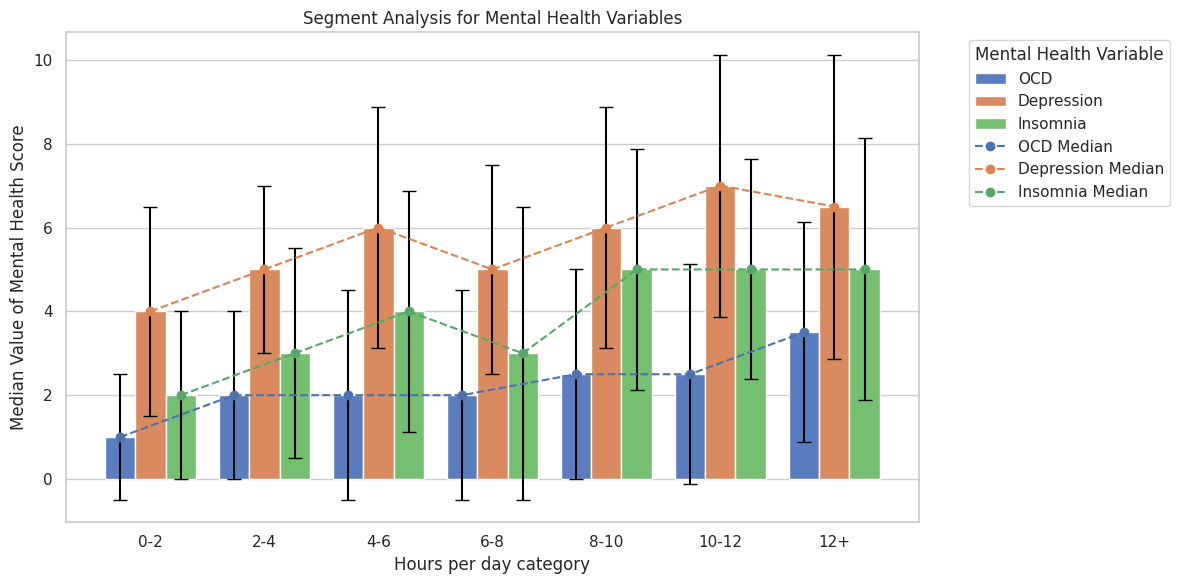

In [ ]:
sns.set(style="whitegrid")

# Create the combined bar plot with error bars
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Hours_per_day_category', y='Median', hue='Variable', data=combined_data, ci=None, palette='muted')

# Calculate the positions of the bars
bar_width = 0.8 / len(combined_data['Variable'].unique())
positions = np.arange(len(category_order))

# Add error bars
for i, var in enumerate(combined_data['Variable'].unique()):
    subset = combined_data[combined_data['Variable'] == var]
    plt.errorbar(x=positions + i * bar_width - 0.4 + bar_width / 2,
                 y=subset['Median'],
                 yerr=subset['IQR'] / 2,
                 fmt='none',
                 c='black',
                 capsize=5)

# Add lines connecting the medians of each mental health variable
for i, var in enumerate(combined_data['Variable'].unique()):
    subset = combined_data[combined_data['Variable'] == var]
    plt.plot(positions + i * bar_width - 0.4 + bar_width / 2,
             subset['Median'],
             marker='o',
             linestyle='--',
             label=f'{var} Median')

# Adjust plot details
plt.title('Segment Analysis for Mental Health Variables')
plt.xlabel('Hours per day category')
plt.ylabel('Median Value of Mental Health Score')

# Place the legend outside the plot
plt.legend(title='Mental Health Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=positions, labels=category_order)
plt.tight_layout()

plt.show()

1. **OCD**:
   - The median values for OCD are consistently low across all categories, similar to the mean values.
   - The IQRs are smaller than the standard deviations, indicating that the central 50% of the data points are closer to the median.

2. **Depression**:
   - Median values for Depression are higher than those for OCD, similar to the mean values.
   - The IQRs are generally smaller than the standard deviations, but still show substantial variability, indicating some spread in the central data points.

3. **Insomnia**:
   - Median values for Insomnia are comparable to or slightly lower than those for Depression.
   - The IQRs are also smaller than the standard deviations, indicating that while there is variability, the central data points are closer to the median.


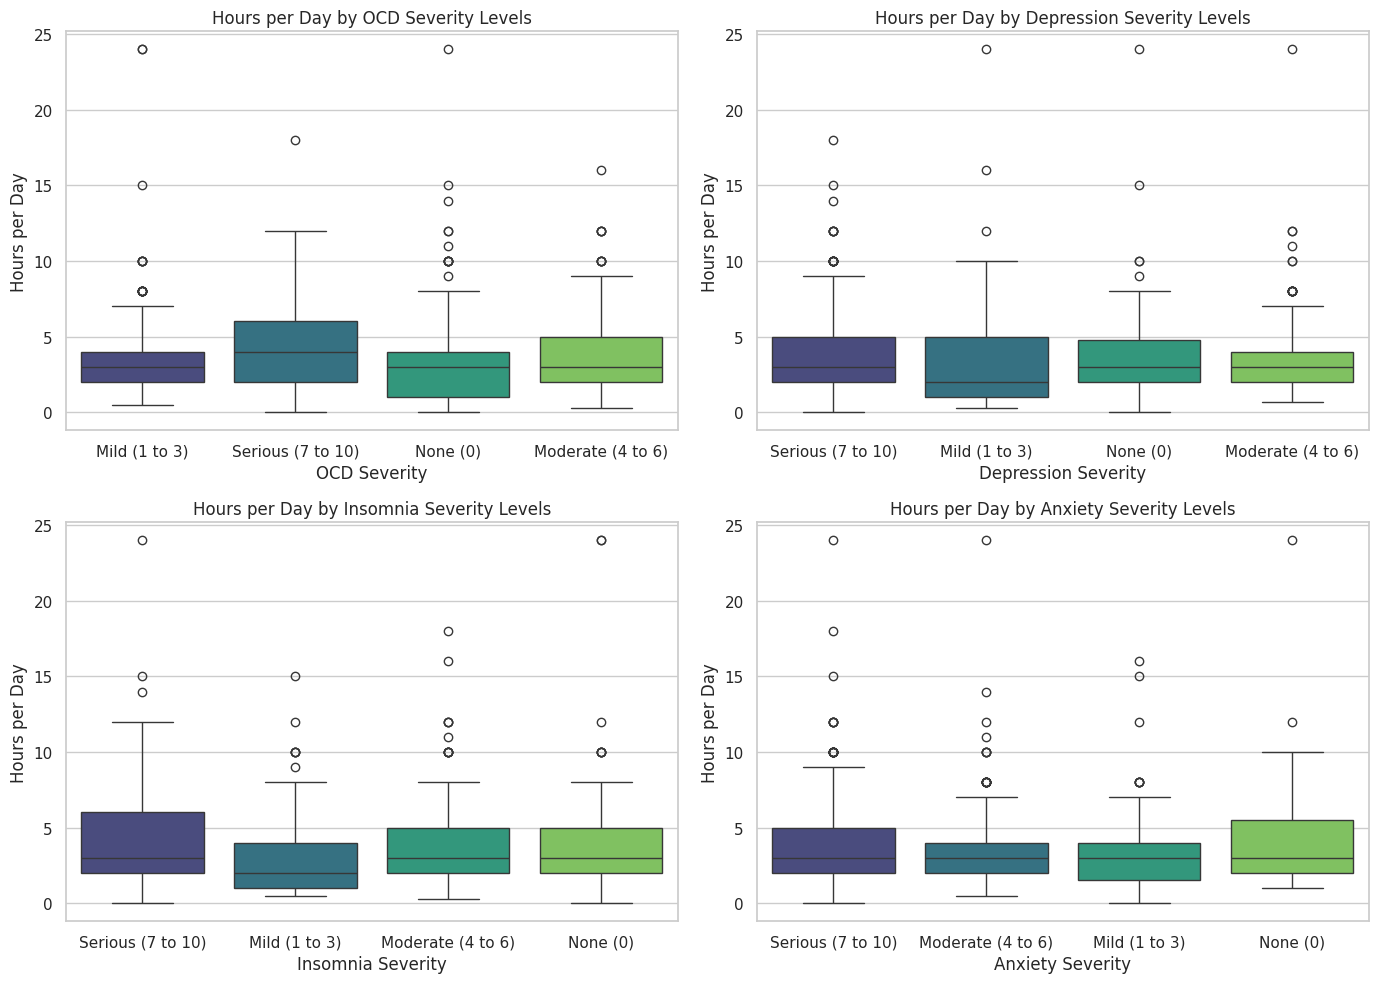

In [ ]:
severity_labels = {
    0: "None (0)",
    1: "Mild (1 to 3)",
    2: "Moderate (4 to 6)",
    3: "Serious (7 to 10)"
}

plt.figure(figsize=(14, 10))

for i, var in enumerate(mental_health_sev_vars, 1):
    plt.subplot(2, 2, i)
    # Replace numerical values with corresponding labels for the current variable
    labeled_data = data.copy()
    labeled_data[var] = labeled_data[var].replace(severity_labels)
    sns.boxplot(data=labeled_data, x=var, y='Hours per day', hue=var, palette='viridis')
    var_name=var.split('_')[0]+" Severity"
    plt.title(f'Hours per Day by {var_name} Levels')
    plt.xlabel(var_name)
    plt.ylabel('Hours per Day')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**OCD and Insomnia:**\
Both conditions show an increase in median hours per day and greater variability as severity increases. However for OCD the increase is more observable \
**Depression and Anxiety:**\
The median hours per day remain relatively stable across severity levels.
The variability does not show a clear trend of increasing or decreasing.



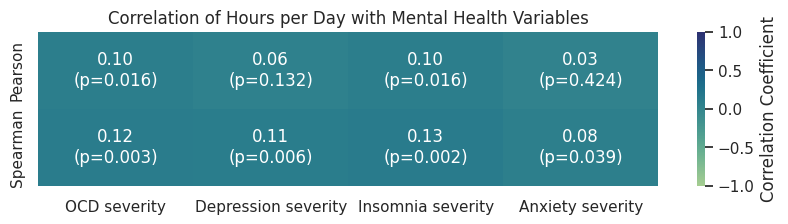

In [ ]:
# Calculate Pearson and Spearman correlations and p-values
def calculate_correlations_and_pvalues(data, variables, target):
    pearson_results = {var: pearsonr(data[var], data[target]) for var in variables}
    spearman_results = {var: spearmanr(data[var], data[target]) for var in variables}

    pearson_corr = {var: res[0] for var, res in pearson_results.items()}
    spearman_corr = {var: res[0] for var, res in spearman_results.items()}
    pearson_pvalues = {var: res[1] for var, res in pearson_results.items()}
    spearman_pvalues = {var: res[1] for var, res in spearman_results.items()}

    return pearson_corr, spearman_corr, pearson_pvalues, spearman_pvalues

# Variables
mental_health_vars = ['OCD_Sev', 'Depression_Sev', 'Insomnia_Sev', 'Anxiety_Sev']
target_var = 'Hours per day'

# Desired labels
labels = {
    'OCD_Sev': 'OCD severity',
    'Depression_Sev': 'Depression severity',
    'Insomnia_Sev': 'Insomnia severity',
    'Anxiety_Sev': 'Anxiety severity'
}

# Calculate correlations and p-values
pearson_corr, spearman_corr, pearson_pvalues, spearman_pvalues = calculate_correlations_and_pvalues(data_clean, mental_health_vars, target_var)

# Combine into DataFrame
combined_corr_row = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
}).T

# Rename the columns using the labels
combined_corr_row.rename(columns=labels, inplace=True)

# Create a DataFrame for annotations
annotations = pd.DataFrame({
    'Pearson': [f"{pearson_corr[var]:.2f}\n(p={pearson_pvalues[var]:.3f})" for var in mental_health_vars],
    'Spearman': [f"{spearman_corr[var]:.2f}\n(p={spearman_pvalues[var]:.3f})" for var in mental_health_vars]
}, index=[labels[var] for var in mental_health_vars]).T

# Draw the heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(combined_corr_row, annot=annotations, fmt='', cmap='crest', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Hours per Day with Mental Health Variables')
plt.show()

In [ ]:
# data_clean=df_changed.copy()
plt.figure(figsize=(10,8))

for i, var in enumerate(mental_health_vars, 1):
    hours_per_day = data_clean['Hours per day']
    tmp_var = data_clean[var]
    # Linear regression analysis
    X = sm.add_constant(hours_per_day)  # Add a constant term for the intercept
    model = sm.OLS(tmp_var, X).fit()
    st, data, ss2 = summary_table(model, alpha=0.05)
    fitted_values = data[:, 2]
    predict_mean_se = data[:, 3]
    predict_ci_low, predict_ci_upp = data[:, 4:6].T

    print(model.summary())

plt.tight_layout()
plt.show()



                            OLS Regression Results                            
Dep. Variable:                OCD_Sev   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.823
Date:                Wed, 29 May 2024   Prob (F-statistic):             0.0161
Time:                        12:40:21   Log-Likelihood:                -882.36
No. Observations:                 616   AIC:                             1769.
Df Residuals:                     614   BIC:                             1778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9962      0.064     15.544

<Figure size 1000x800 with 0 Axes>


General Observations:
1. **Weak Positive Correlations:**
   - All four mental health conditions (OCD, Depression, Insomnia, and Anxiety) show weak positive correlations with hours per day, implying that as the hours per day increase, the severity of these conditions tends to increase slightly.
   
2. **Statistical Significance:**
   - The correlations for OCD, Depression, and Insomnia are statistically significant, indicating a reliable relationship.
   - Anxiety shows a statistically significant relationship only in the Spearman correlation, but not in the Pearson correlation or OLS regression, suggesting a weak and inconsistent relationship.

3. **Explained Variance:**
   - The R-squared values for all OLS regressions are very low, indicating that hours per day explain only a small fraction of the variance in each mental health condition.
   - This suggests that other factors not included in the model likely play a much more significant role in the severity of these conditions.



### 2.  what is the relation between "duration" and "Music effect on them"?
Independent variable: "Duration" is Continuous

dependent variable: "Music effects" is Categorical


<ipython-input-14-da99e222cd0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Music effects', y='Hours per day', data=backupdf, palette=custom_palette)


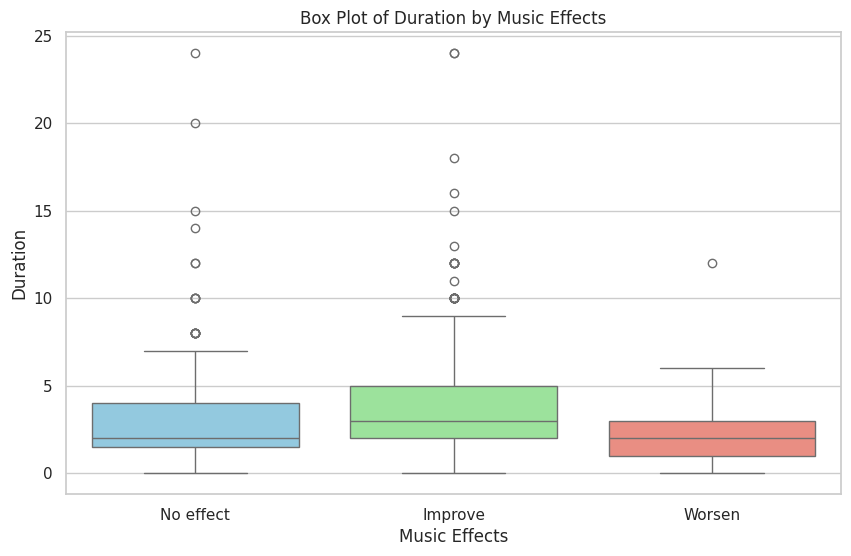

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = {'Worsen': 'salmon', 'No effect': 'skyblue', 'Improve': 'lightgreen'}
sns.boxplot(x='Music effects', y='Hours per day', data=backupdf, palette=custom_palette)
plt.title('Box Plot of Duration by Music Effects')
plt.xlabel('Music Effects')
plt.ylabel('Duration')
plt.show()

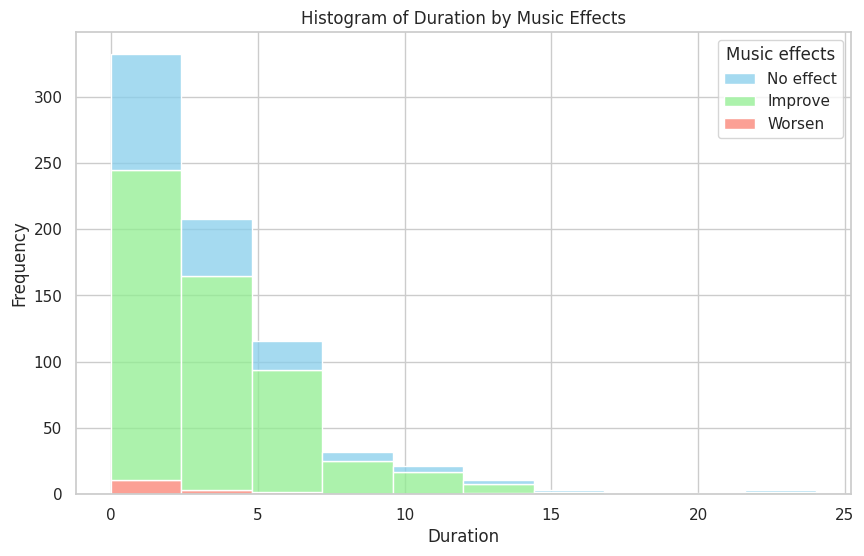

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = {'Worsen': 'salmon', 'No effect': 'skyblue', 'Improve': 'lightgreen'}
sns.histplot(data=backupdf, x='Hours per day', hue='Music effects', multiple='stack', bins=10,palette=custom_palette)
plt.title('Histogram of Duration by Music Effects')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


Combining these two graph, we can suggest that (hours per day) are generally perceived as either improving the experience or having no effect, with very few instances of worsening the experience. As the duration increases, the frequency of perceived improvement remains high, while the perception of no effect decreases significantly. Negative effects are rare across all durations.

In [ ]:
data=df.copy()
data_clean = df.dropna(subset=['Hours per day', 'Music effects'])
X = data_clean['Hours per day']
y = data_clean['Music effects']
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')
result.summary()


Optimization terminated successfully.
         Current function value: 0.635577
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Music effects   Log-Likelihood:                -391.52
Model:                   OrderedModel   AIC:                             789.0
Method:            Maximum Likelihood   BIC:                             802.3
Date:                Wed, 29 May 2024                                         
Time:                        12:40:23                                         
No. Observations:                 616                                         
Df Residuals:                     613                                         
Df Model:                           1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Hours per day     0.0288      0.032      0.892      0.372      -0.034       0.092
-1/0             -3.5872      0.285    -12.595      0.000      -4.145      -3.029
0/1               0.9429      0.098      9.603      0.000       0.750       1.135
=================================================================================
"""

The categorical outcome "Music effects" is mapped as follows:
- Improve: 1
- No effect: 0
- Worsen: -1

 Interpretation of Results

1. **Coefficient of Hours per Day:**
   - The coefficient for "Hours per day" is 0.0288, which is a very small positive value.
   - The p-value associated with this coefficient is 0.372, which is greater than 0.05. This indicates that the relationship between "Hours per day" and "Music effects" is not statistically significant.
   - The confidence interval for the coefficient ranges from -0.034 to 0.092, which includes zero, further suggesting a lack of significant effect.

2. **Thresholds:**
   - The thresholds are used to define the boundaries between the ordered categories of the dependent variable.
   - The estimates for the thresholds are statistically significant with very low p-values, indicating that the categories of "Music effects" are well-separated.

Conclusion
The analysis indicates that the duration of hours per day does not have a statistically significant effect on "Music effects."



In [ ]:
groups = [df['Hours per day'][df['Music effects'] == effect] for effect in df['Music effects'].unique()]

# Perform ANOVA
stat, p = f_oneway(*groups)
print(f"ANOVA: stat={stat}, p-value={p}")

ANOVA: stat=0.6514224981262938, p-value=0.5216641838261649


In [ ]:
from scipy.stats import kruskal

# Prepare data for Kruskal-Wallis test
groups = [df['Hours per day'][df['Music effects'] == effect] for effect in df['Music effects'].unique()]

# Perform the Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H Test: stat={stat}, p-value={p}")

Kruskal-Wallis H Test: stat=4.668536339660924, p-value=0.09688135728928221


Both tests (ANOVA and Kruskal-Wallis) indicate that there is no strong evidence to suggest a significant difference in the duration of music listening per day across the different categories of music effects.\
The p-value from the Kruskal-Wallis test is close to the 0.10 level, which might suggest some weak evidence of a difference. This could be worth further investigation with a larger sample size or more refined data.


## RQ2 Effect of While Working



### 1.  what is the relation between "while working" and "OCD", "depression", "Insomnia", "Anxiety"?

<Figure size 640x480 with 0 Axes>

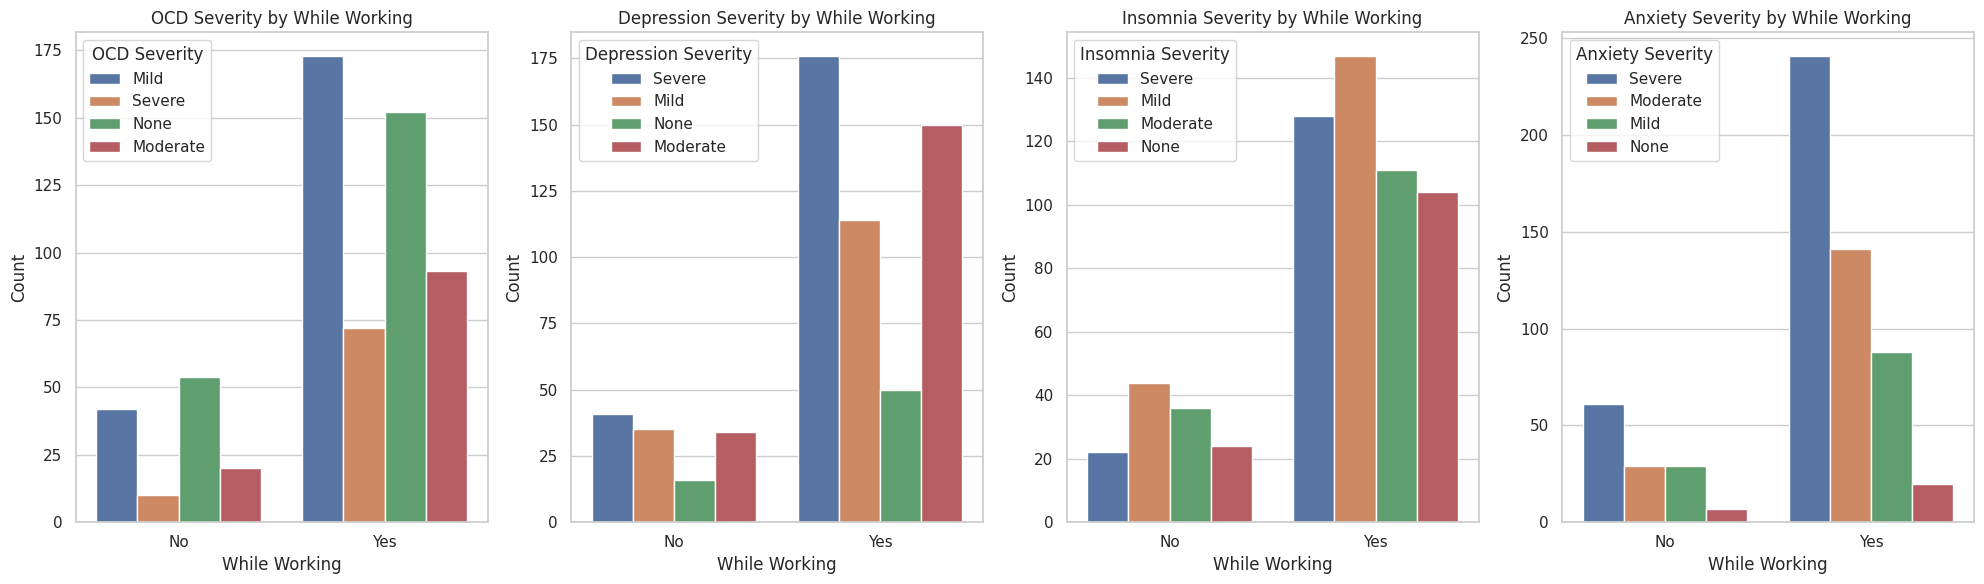

In [ ]:
data_clean = df_changed.copy()
data_clean['While working'] = data_clean['While working'].map({1: 'Yes', 0: 'No'})

plt.figure()

# Map severity levels to descriptive labels
severity_mapping = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}

# Apply the mapping to each mental health variable
for var in mental_health_vars:
    data_clean[var] = data_clean[var].map(severity_mapping)

# Define the labels for the plots
labels = {
    'OCD_Sev': 'OCD Severity',
    'Depression_Sev': 'Depression Severity',
    'Insomnia_Sev': 'Insomnia Severity',
    'Anxiety_Sev': 'Anxiety Severity'
}

plt.figure(figsize=(20, 6))

# Loop through the mental health variables to create count plots
for i, var in enumerate(mental_health_vars, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x='While working', hue=var, data=data_clean)
    plt.title(f'{labels[var]} by While Working', fontsize=12)
    plt.xlabel('While Working', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=labels[var])

plt.tight_layout()
plt.show()

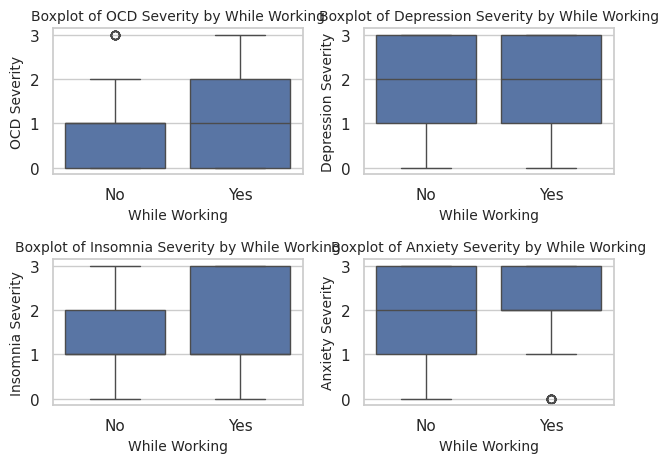

In [ ]:
data_clean = df_changed.copy()
data_clean['While working'] = data_clean['While working'].map({1: 'Yes', 0: 'No'})

plt.figure()

# Loop through the mental health variables to create boxplots
for i, var in enumerate(mental_health_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='While working', y=var, data=data_clean)
    plt.title(f'Boxplot of {labels[var]} by While Working', fontsize=10)  # Using the updated labels
    plt.xlabel('While Working', fontsize=10)
    plt.ylabel(labels[var], fontsize=10)

plt.tight_layout()
plt.show()



- **OCD and Insomnia:** Listening to music while working appears to be associated with higher median levels and greater variability in OCD and Insomnia symptoms. This might indicate that music could have varying effects, potentially increasing symptoms for some individuals.
- **Depression and Anxiety:** The impact of listening to music while working on Depression and Anxiety symptoms seems to be less pronounced, with similar medians and variability for both groups.


In [ ]:
# data_clean = data_clean.dropna(subset=['While working'])
data_clean= df_changed.copy()
for var in mental_health_vars:
    yes_group = data_clean[data_clean['While working'] == 1][var].dropna()
    no_group = data_clean[data_clean['While working'] == 0][var].dropna()

    # Check if both groups have data
    if len(yes_group) > 0 and len(no_group) > 0:
        # Perform t-test
        t_stat, t_p = ttest_ind(yes_group, no_group, nan_policy='omit')

        u_stat, u_p = mannwhitneyu(yes_group, no_group, alternative='two-sided', use_continuity=True)

        print(f"{var} by While working - t-test: t-statistic = {t_stat}, p-value = {t_p}")
        print(f"{var} by While working - Mann-Whitney U test: U-statistic = {u_stat}, p-value = {u_p}")
    else:
        print(f"{var} by While working - One of the groups is empty, cannot perform statistical test.")


OCD_Sev by While working - t-test: t-statistic = 2.811065849103089, p-value = 0.0050953298407613624
OCD_Sev by While working - Mann-Whitney U test: U-statistic = 35649.0, p-value = 0.004968219517058629
Depression_Sev by While working - t-test: t-statistic = 1.2814470108084874, p-value = 0.20052042330223815
Depression_Sev by While working - Mann-Whitney U test: U-statistic = 32987.0, p-value = 0.21410153491500383
Insomnia_Sev by While working - t-test: t-statistic = 0.8598549448044646, p-value = 0.39020460431610227
Insomnia_Sev by While working - Mann-Whitney U test: U-statistic = 32276.0, p-value = 0.41415636537478806
Anxiety_Sev by While working - t-test: t-statistic = 0.9751554192282799, p-value = 0.3298671988175821
Anxiety_Sev by While working - Mann-Whitney U test: U-statistic = 32098.0, p-value = 0.4560152153704742


The statistical tests indicate that listening to music while working is associated with higher OCD scores, as evidenced by the statistically significant results from both the t-test and Mann-Whitney U test. However, there are no significant differences in Depression, Insomnia, or Anxiety scores between individuals who listen to music while working and those who do not. These findings suggest that while music may impact OCD, it does not have a significant effect on Depression, Insomnia, or Anxiety in the context of working.


### 2.  what is the relation between "while working" and "Music effect on them"?

Independent variable: "While working" is Categorical (YES/NO)

dependent variable: "Music effects" is Categorical

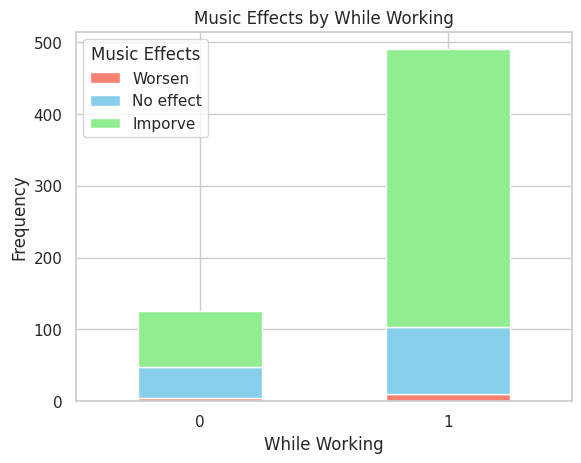

In [ ]:
# Create a crosstab
crosstab = pd.crosstab(df['While working'], df['Music effects'])

# Update the column names for the plot
crosstab.columns = ['Worsen', 'No effect', 'Imporve']

# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['salmon', 'skyblue', 'lightgreen'])
plt.xticks(rotation=0)
plt.xlabel('While Working')
plt.ylabel('Frequency')
plt.title('Music Effects by While Working')
plt.legend(title='Music Effects')
plt.show()

The stacked bar chart suggests that listening to music while working has a significant impact on the perceived effect of music. Specifically:
- Individuals who listen to music while working are more likely to report "Improvement" in their state.
- The majority of individuals who do not listen to music while working report "No effect" or "Improvement," with very few reporting a worsening effect.


In [ ]:
contingency_table = pd.crosstab(data_clean['While working'], data_clean['Music effects'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square test results:
Chi-square statistic: 14.050031424756284
p-value: 0.0008893535456362051
Degrees of freedom: 2
Expected frequencies:
[[  3.06818182  27.81818182  95.11363636]
 [ 11.93181818 108.18181818 369.88636364]]


There is a statistically significant relationship between whether someone is working and the effects of music they experience. This suggests that the context of working may influence how music affects individuals, and vice versa.

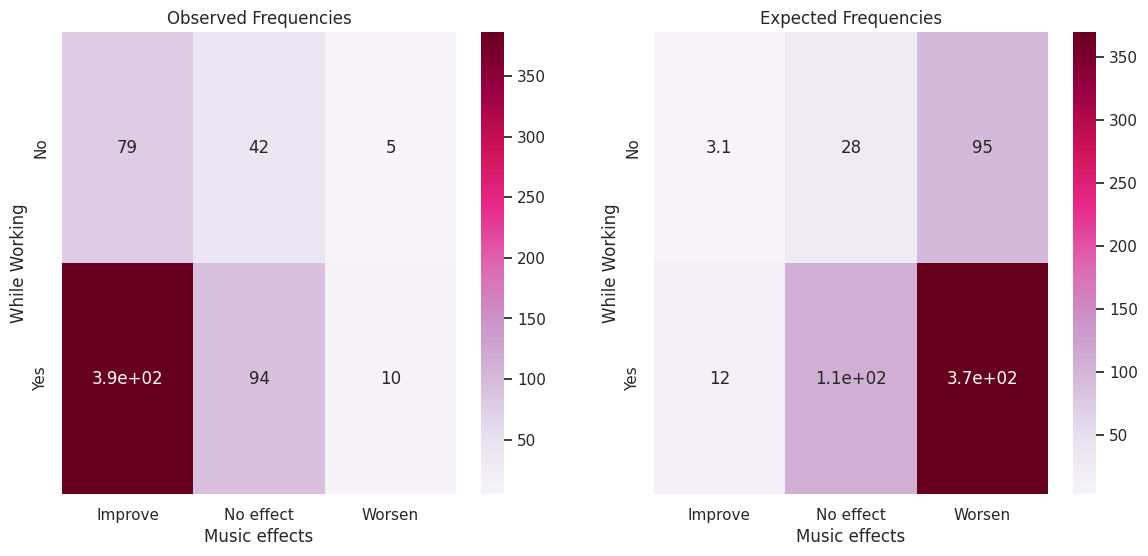

In [ ]:
data_clean['Music_effects_label'] = data_clean['Music effects'].map({-1: 'Worsen', 0: 'No effect', 1: 'Improve'})
data_clean['While_working_label'] = data_clean['While working'].map({0: 'No', 1: 'Yes'})
contingency_table = pd.crosstab(data_clean['While_working_label'], data_clean['Music_effects_label'])

plt.figure(figsize=(14, 6))

# Observed frequencies
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, cmap='PuRd', cbar=True)
plt.title('Observed Frequencies')
plt.xlabel('Music effects')
plt.ylabel('While Working')
# Expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns), annot=True, cmap='PuRd')
plt.title('Expected Frequencies')
plt.xlabel('Music effects')
plt.ylabel('While Working')
plt.show()

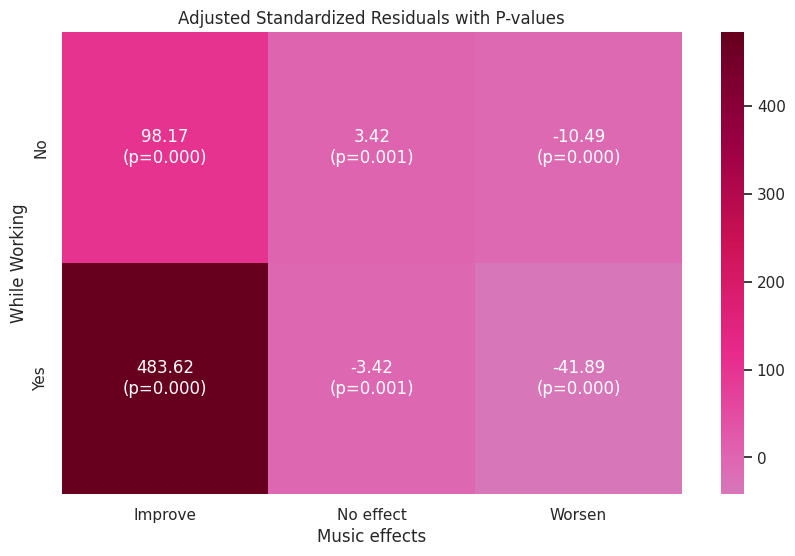

In [ ]:
# Assuming `contingency_table` is already defined
observed = np.array(contingency_table)
expected = np.array(expected)
residuals = (observed - expected) / np.sqrt(expected)

n = np.sum(observed)
row_totals = np.sum(observed, axis=1).reshape(-1, 1)
col_totals = np.sum(observed, axis=0).reshape(1, -1)

adjusted_residuals = (observed - expected) / np.sqrt(expected * (1 - row_totals / n) * (1 - col_totals / n))

# Calculate p-values for the adjusted residuals
p_values = 2 * (1 - norm.cdf(np.abs(adjusted_residuals)))

# Create annotations with both adjusted residuals and p-values
annotations = np.array([f"{adj_res:.2f}\n(p={p_val:.3f})" for adj_res, p_val in zip(adjusted_residuals.flatten(), p_values.flatten())])
annotations = annotations.reshape(adjusted_residuals.shape)

# Create a heatmap of adjusted standardized residuals with p-values using a pink-purple palette
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(adjusted_residuals, index=contingency_table.index, columns=contingency_table.columns),
            annot=annotations, fmt='', cmap='PuRd', center=0)
plt.title('Adjusted Standardized Residuals with P-values')
plt.xlabel('Music effects')
plt.ylabel('While Working')
plt.show()

## RQ3 Effect of Background


### 1.  what is the relation between "background (composer, instrumental)" and "OCD", "depression", "Insomnia", "Anxiety"?



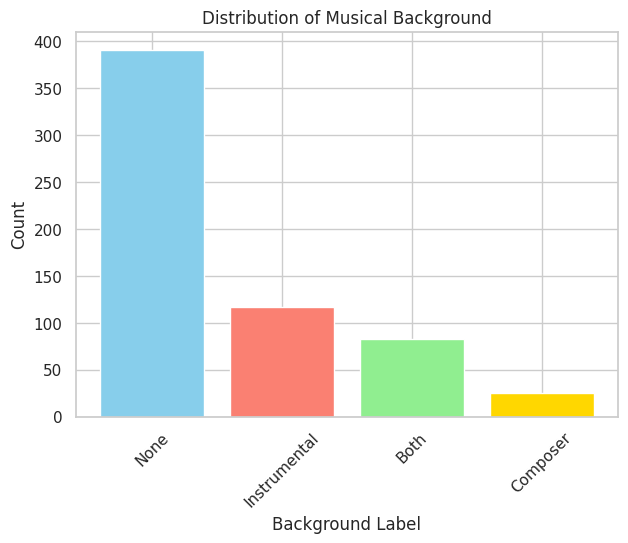

In [ ]:
background_counts = data_clean['background_label'].value_counts()
plt.figure(figsize=(7, 5))
plt.bar(background_counts.index, background_counts.values, color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.xlabel('Background Label')
plt.ylabel('Count')
plt.title('Distribution of Musical Background')
plt.xticks(rotation=45)
plt.show()


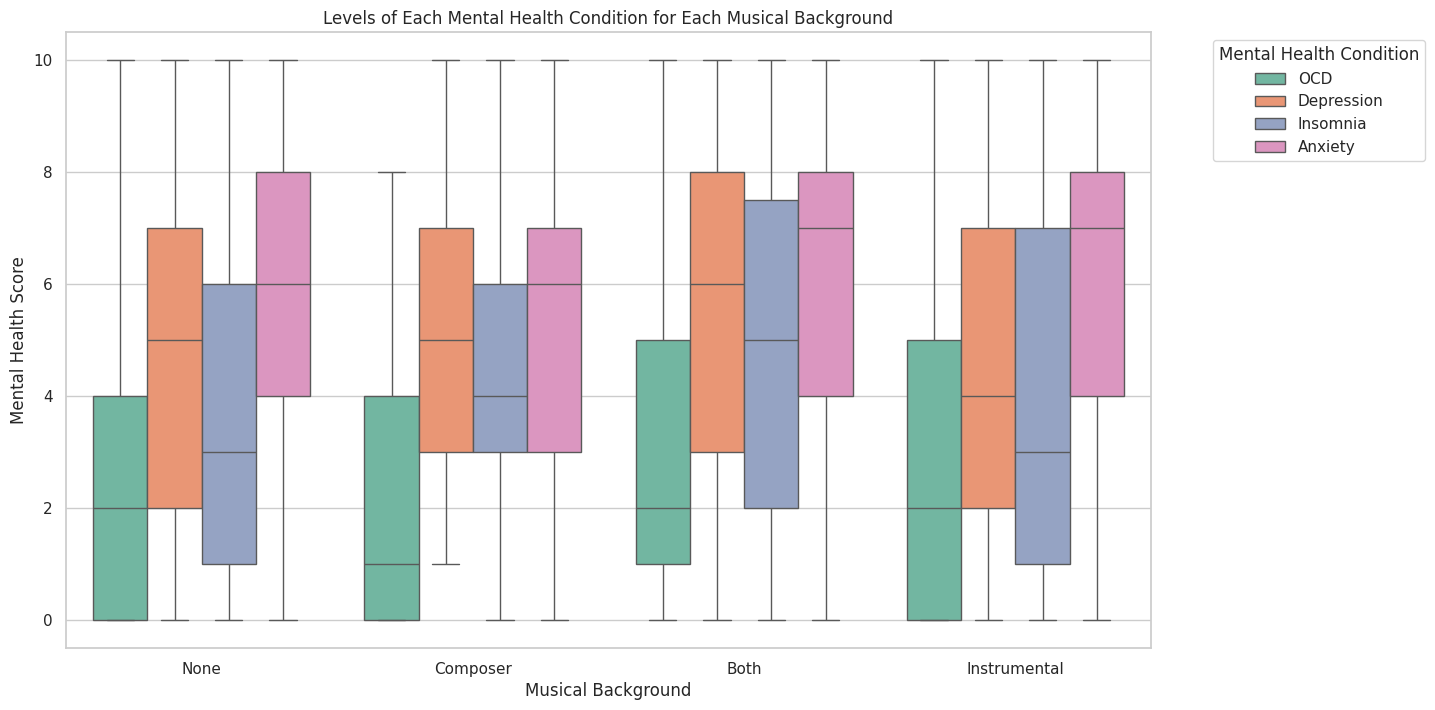

In [ ]:
data_clean = df_changed.copy()

# Melt the dataframe for easier plotting
melted_data = data_clean.melt(id_vars=['background_label'],
                              value_vars=['OCD', 'Depression', 'Insomnia', 'Anxiety'],
                              var_name='Mental Health',
                              value_name='Score')

# Plotting using box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x='background_label', y='Score', hue='Mental Health', palette='Set2')
plt.title('Levels of Each Mental Health Condition for Each Musical Background')
plt.xlabel('Musical Background')
plt.ylabel('Mental Health Score')
plt.legend(title='Mental Health Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Perform ANOVA test for each mental health variable
for var in mental_health_vars:
    model = stats.f_oneway(
        data_clean[data_clean['background'] == 0][var],
        data_clean[data_clean['background'] == 1][var],
        data_clean[data_clean['background'] == 2][var],
        data_clean[data_clean['background'] == 3][var]
    )
    print(f"ANOVA test for 'background' and '{var}':")
    print(f"F-statistic: {model.statistic}")
    print(f"p-value: {model.pvalue}")
    print("\n")
    tukey = pairwise_tukeyhsd(endog=data_clean[var], groups=data_clean['background_label'], alpha=0.05)
    print(f"Tukey's HSD test for '{var}':")
    print(tukey)
    print("_________________________________")
    print("\n")

ANOVA test for 'background' and 'OCD_Sev':
F-statistic: 1.1019737573865664
p-value: 0.3476823290546372


Tukey's HSD test for 'OCD_Sev':
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
        Both     Composer  -0.3851 0.3479 -0.9839 0.2138  False
        Both Instrumental  -0.1369 0.7855 -0.5135 0.2398  False
        Both         None  -0.1704 0.5099 -0.4877 0.1468  False
    Composer Instrumental   0.2482 0.6862 -0.3301 0.8266  False
    Composer         None   0.2146 0.7372 -0.3269 0.7561  False
Instrumental         None  -0.0336 0.9894 -0.3102  0.243  False
---------------------------------------------------------------
_________________________________


ANOVA test for 'background' and 'Depression_Sev':
F-statistic: 1.6941001814784167
p-value: 0.16706730993339935


Tukey's HSD test for 'Depression_Sev':
      Multiple Comparison of Means 

since all the p-values are bigger than 0.05, we can say that there is no significant pairwise differences. However, the comparison between "both" and "None" for "Insomnia" has a marginal p-value of 0.0646 suggesting that more data could reveal a significant difference.

### 2.  what is the relation between "background (composer, instrumental)" and "Music effect on them"?

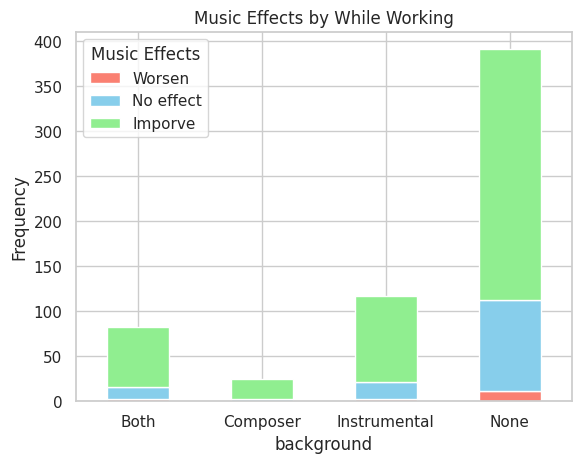

In [ ]:
# Create a crosstab
crosstab = pd.crosstab(data_clean['background_label'], df_changed['Music effects'])

# Update the column names for the plot
crosstab.columns = ['Worsen', 'No effect', 'Imporve']

# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['salmon', 'skyblue', 'lightgreen'])
plt.xticks(rotation=0)
plt.xlabel('background')
plt.ylabel('Frequency')
plt.title('Music Effects by While Working')
plt.legend(title='Music Effects')
plt.show()

In [ ]:
data_clean['Music_effects_label'] = data_clean['Music effects'].map({-1: 'Worsen', 0: 'No effect', 1: 'Improve'})
contingency_table = pd.crosstab(data_clean['background_label'], data_clean['Music_effects_label'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square test results:
Chi-square statistic: 11.414397651779971
p-value: 0.07638279676413942
Degrees of freedom: 6
Expected frequencies:
[[ 62.65422078  18.32467532   2.0211039 ]
 [ 18.87175325   5.51948052   0.60876623]
 [ 88.31980519  25.83116883   2.84902597]
 [295.15422078  86.32467532   9.5211039 ]]


Since the p-value is less than 0.05, we can say there is a statistically significant association between the background and Music effects variables.

In order to know which specific categories contribute most to the chi-square statistic we can run adjusted standardized residual.

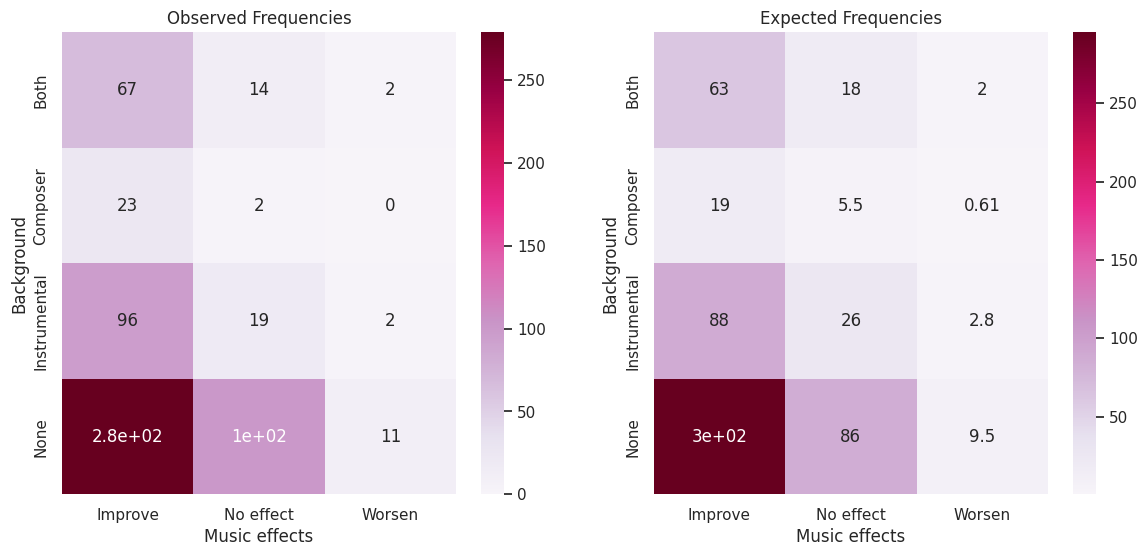

In [ ]:
plt.figure(figsize=(14, 6))

# Observed frequencies
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, cmap='PuRd', cbar=True)
plt.title('Observed Frequencies')
plt.xlabel('Music effects')
plt.ylabel('Background')
# Expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns), annot=True, cmap='PuRd')
plt.title('Expected Frequencies')
plt.xlabel('Music effects')
plt.ylabel('Background')
plt.show()

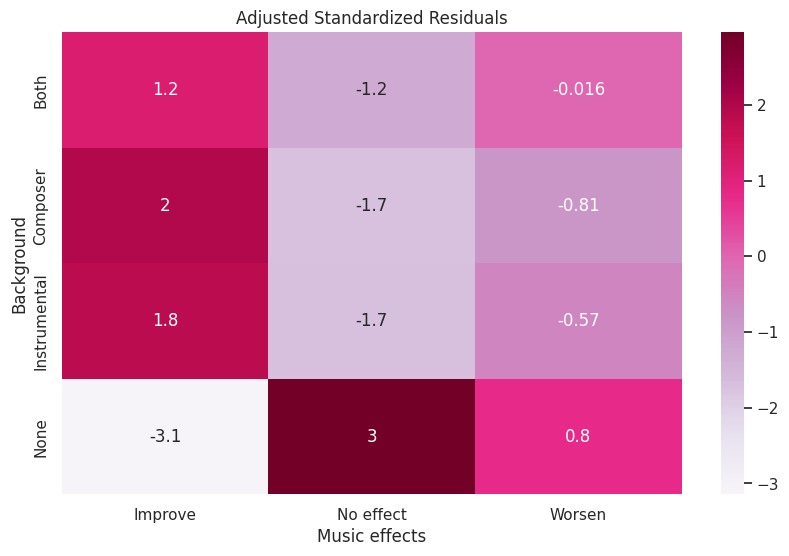

In [ ]:
observed = np.array(contingency_table)
expected = np.array(expected)
residuals = (observed - expected) / np.sqrt(expected)

n = np.sum(observed)
row_totals = np.sum(observed, axis=1).reshape(-1, 1)
col_totals = np.sum(observed, axis=0).reshape(1, -1)

adjusted_residuals = (observed - expected) / np.sqrt(expected * (1 - row_totals / n) * (1 - col_totals / n))

# Create a heatmap of adjusted standardized residuals using a pink-purple palette
plt.figure(figsize=(10, 6))
# sns.heatmap(adjusted_residuals, annot=True, cmap='PuRd', center=0)
sns.heatmap(pd.DataFrame(adjusted_residuals, index=contingency_table.index, columns=contingency_table.columns), annot=True, cmap='PuRd', center=0)
plt.title('Adjusted Standardized Residuals')
plt.xlabel('Music effects')
plt.ylabel('Background')
plt.show()

There is evidence of a significant association between background and Music effects, particularly in the "No Effect" category for the "None" background group.

Other categories do not show significant deviations, suggesting that the association might be driven primarily by this specific cell.

# Hypothesis 2

We suggest that individuals' preference for a type of music including their favorite genre, frequency of listening to different genres and the exploration of new and foreign music of the music might also have an impact on their mental health state and thoughts on music's effectiveness in supporting their mental health.

RQ1:
1.  what is the relation between "favorite genre" and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "favorite genre" and "Music effect on them"?

RQ2:
1.  what is the relation between "frequency" of listening to different genres and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "frequency" of listening to different genres  and "Music effect on them"?

RQ3:
1.  what is the relation between "exploration" and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "exploration" and "Music effect on them"?

RQ4:
1.  what is the relation between "Foreign" and "OCD", "depression", "Insomnia", "Anxiety"? \
2.  what is the relation between "Foreign" and "Music effect on them"?


RQ5:
1. what is the interaction factors between these factors?

## RQ1 Effect of favorite genre

### 1.What is the relation between "favorite genre" and "OCD", "depression", "Insomnia", "Anxiety"?


In [ ]:
df_changed= df.copy()

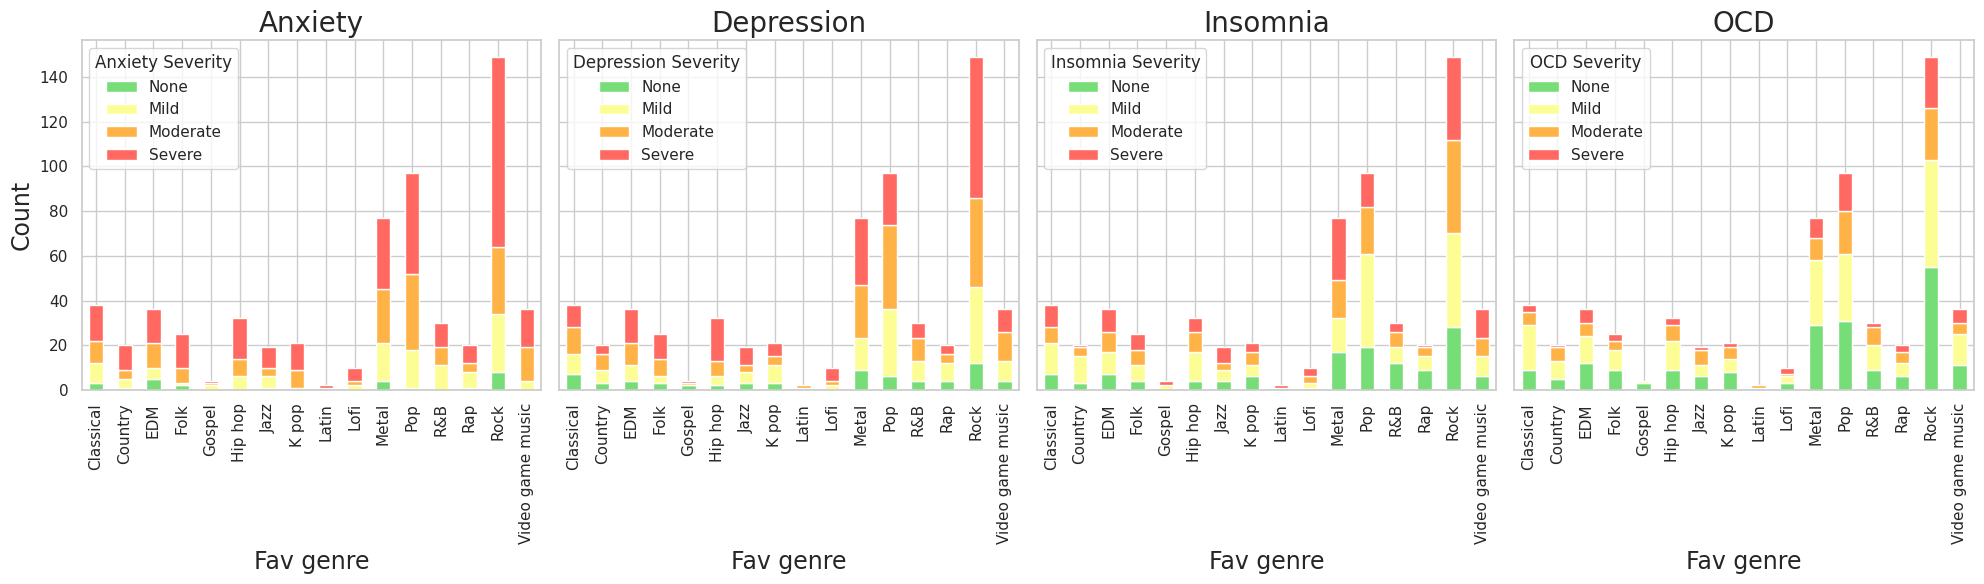

In [ ]:
custom_palette = {0: '#77dd77',  # Pastel green
                  1: '#fdfd96',  # Pastel yellow
                  2: '#ffb347',  # Pastel orange
                  3: '#ff6961'}  # Pastel red

# Define conditions
conditions = [('Anxiety', 'Anxiety_Sev'), ('Depression', 'Depression_Sev'), ('Insomnia', 'Insomnia_Sev'), ('OCD', 'OCD_Sev')]

# Create subplots
fig, axes = plt.subplots(1, len(conditions), figsize=(20, 6), sharey=True)

for i, (condition, sev_col) in enumerate(conditions):
    crosstab = pd.crosstab(df_changed['Fav genre'], df_changed[sev_col])
    crosstab.plot(kind='bar', stacked=True, color=[custom_palette[j] for j in crosstab.columns], ax=axes[i])
    axes[i].legend(title=condition + ' Severity', labels=['None', 'Mild', 'Moderate', 'Severe'])
    axes[i].set_title(condition, fontsize = 20)
    axes[i].set_xlabel('Fav genre', fontsize = 17)
    if i == 0:
        axes[i].set_ylabel('Count', fontsize = 17)

plt.tight_layout()
plt.show()

In [ ]:
mental_health_measures = ['OCD', 'Depression', 'Insomnia', 'Anxiety']
anova_results = {}
data_clean = df_changed.copy()
# Perform ANOVA for each mental health measure
for measure in mental_health_measures:
    # Group the data by favorite genre
    groups = [data_clean[data_clean['Fav genre'] == genre][measure].dropna() for genre in data_clean['Fav genre'].unique()]
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*groups)
    anova_results[measure] = anova_result

# Display results
for measure, result in anova_results.items():
    print(f"ANOVA result for {measure}: F={result.statistic}, p={result.pvalue}")


ANOVA result for OCD: F=0.4367272299722432, p=0.968142776260566
ANOVA result for Depression: F=1.8370739725448944, p=0.026900772194568
ANOVA result for Insomnia: F=1.9528743330830172, p=0.016527157577551452
ANOVA result for Anxiety: F=1.104629217633773, p=0.34829341238924655


Since there p-value for Insomnia and Depression is smaller than 0.05. we can say there are statistically significant differences in insomnia and  depression scores across different favorite music genres.

In [ ]:
model_depression = ols('Depression ~ C(data_clean["Fav genre"])', data=data_clean).fit()
anova_table_depression = sm.stats.anova_lm(model_depression, typ=2)
print("ANOVA Table for Depression")
print(anova_table_depression)

tukey_depression = pairwise_tukeyhsd(endog=data_clean['Depression'], groups=data_clean['Fav genre'], alpha=0.05)
print("Tukey's HSD for Depression")
print(tukey_depression)

# Post Hoc test for Insomnia
model_insomnia = ols('Insomnia ~ C(data_clean["Fav genre"])', data=data_clean).fit()
anova_table_insomnia = sm.stats.anova_lm(model_insomnia, typ=2)
print("ANOVA Table for Insomnia")
print(anova_table_insomnia)

tukey_insomnia = pairwise_tukeyhsd(endog=data_clean['Insomnia'], groups=data_clean['Fav genre'], alpha=0.05)
print("Tukey's HSD for Insomnia")
print(tukey_insomnia)

ANOVA Table for Depression
                                 sum_sq     df         F    PR(>F)
C(data_clean["Fav genre"])   242.719791   15.0  1.837074  0.026901
Residual                    5284.921443  600.0       NaN       NaN
Tukey's HSD for Depression
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country  -0.2684    1.0 -3.0895 2.5526  False
Classical              EDM   0.7427 0.9995 -1.6324 3.1177  False
Classical             Folk   0.9116 0.9984 -1.7181 3.5413  False
Classical           Gospel  -0.8684    1.0 -6.2363 4.4995  False
Classical          Hip hop   1.7253 0.5309 -0.7248 4.1754  False
Classical             Jazz   0.2105    1.0 -2.6587 3.0798  False
Classical            K pop  -0.4637    1.0 -3.2403  2.313  False
Classical            Latin   0.1316    1.0 -7.2768   7.54  False
Classical             Lofi   2

**Tukey's HSD Post Hoc Test for Depression and Insomnia:**
- The Tukey's HSD results show that there are no significant pairwise differences between any specific pairs of favorite music genres for depression and insomnia . All the comparisons have p-values greater than 0.05, indicating that while ANOVA found a significant effect of genre on depression, the differences between individual genres are not significant after correcting for multiple comparisons.


### 2. what is the relation between "favorite genre" and "Music effect on them"?


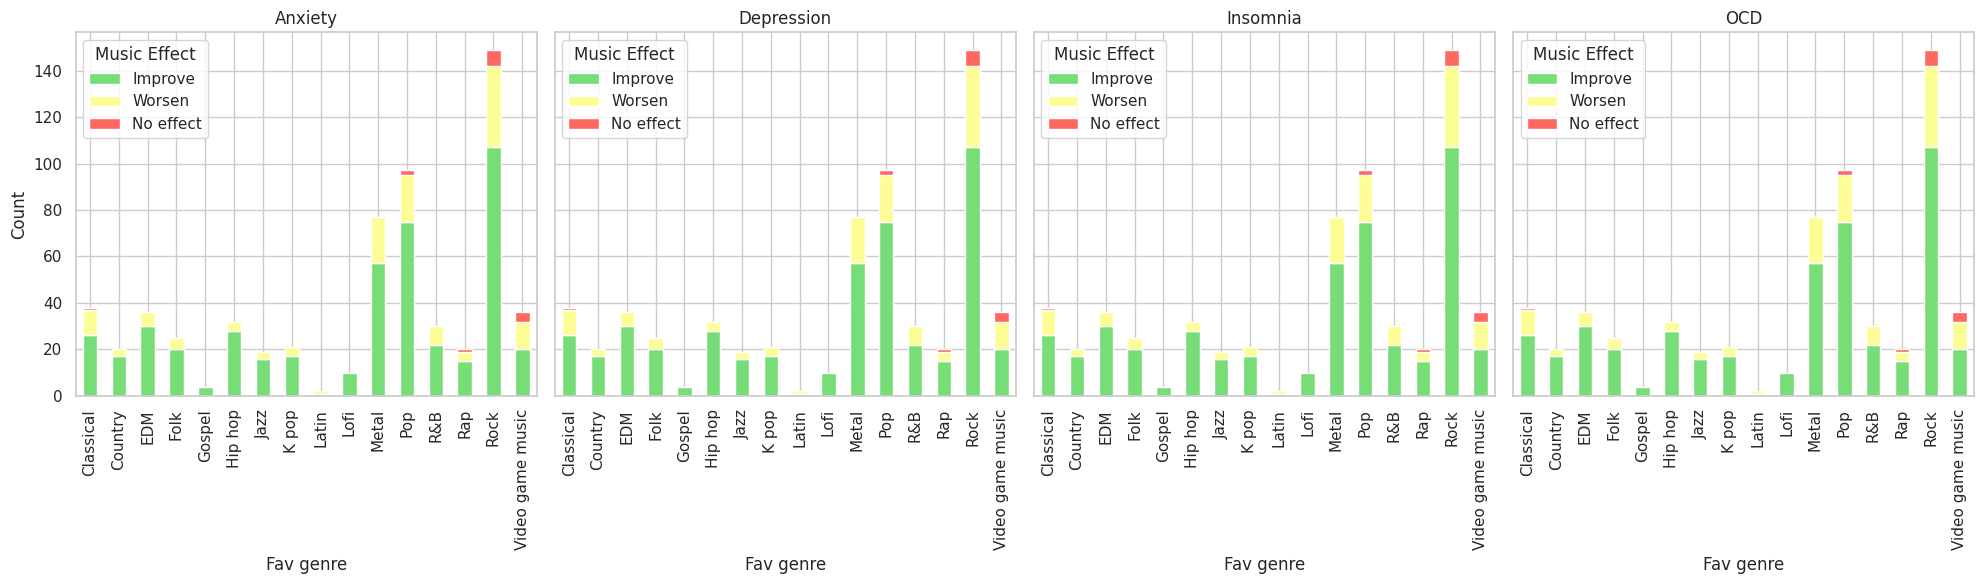

In [ ]:
conditions = [('Anxiety', 'Anxiety_Sev'), ('Depression', 'Depression_Sev'), ('Insomnia', 'Insomnia_Sev'), ('OCD', 'OCD_Sev')]

df_changed.dropna()
# Define custom pastel color palette
custom_palette = {'Improve': '#77dd77',  # Pastel green
                  'Worsen': '#ff6961',  # Pastel red
                  'No effect': '#fdfd96'}  # Pastel yellow

fig, axes = plt.subplots(1, len(conditions), figsize=(20, 6), sharey=True)

for i, (condition, sev_col) in enumerate(conditions):
    crosstab = pd.crosstab(df_changed['Fav genre'], df_changed['Music_effects_label'])
    crosstab.plot(kind='bar', stacked=True, color=[custom_palette[effect] for effect in crosstab.columns], ax=axes[i])
    axes[i].legend(title='Music Effect', labels=['Improve', 'Worsen', 'No effect'])
    axes[i].set_title(condition)
    axes[i].set_xlabel('Fav genre')
    if i == 0:
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
contingency_table = pd.crosstab(data_clean['Fav genre'], data_clean['Music effects'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test Results")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Test Results
Chi2 Statistic: 37.350040971862725
p-value: 0.16715960860165582
Degrees of Freedom: 30
Expected Frequencies:
[[9.25324675e-01 8.38961039e+00 2.86850649e+01]
 [4.87012987e-01 4.41558442e+00 1.50974026e+01]
 [8.76623377e-01 7.94805195e+00 2.71753247e+01]
 [6.08766234e-01 5.51948052e+00 1.88717532e+01]
 [9.74025974e-02 8.83116883e-01 3.01948052e+00]
 [7.79220779e-01 7.06493506e+00 2.41558442e+01]
 [4.62662338e-01 4.19480519e+00 1.43425325e+01]
 [5.11363636e-01 4.63636364e+00 1.58522727e+01]
 [4.87012987e-02 4.41558442e-01 1.50974026e+00]
 [2.43506494e-01 2.20779221e+00 7.54870130e+00]
 [1.87500000e+00 1.70000000e+01 5.81250000e+01]
 [2.36201299e+00 2.14155844e+01 7.32224026e+01]
 [7.30519481e-01 6.62337662e+00 2.26461039e+01]
 [4.87012987e-01 4.41558442e+00 1.50974026e+01]
 [3.62824675e+00 3.28961039e+01 1.12475649e+02]
 [8.76623377e-01 7.94805195e+00 2.71753247e+01]]


Based on the Chi-Square test, we do not have sufficient evidence to conclude that there is a significant relationship between the favorite genre and the effect of music (improve, worsen, no effect). The p-value of 0.167 suggests that any observed differences could likely be due to random chance rather than a true association.

## RQ2 Effect of how often they listen to specific genre


### 1.  what is the relation between "frequency" of listening to different genres and "OCD", "depression", "Insomnia", "Anxiety"?

In [ ]:
selected_columns = frequency_columns + mental_health_vars
data_selected = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Calculate p-values
p_values = pd.DataFrame(index=frequency_columns, columns=mental_health_vars)
for freq_col in frequency_columns:
    for mh_col in mental_health_vars:
        corr, p_value = pearsonr(data_selected[freq_col], data_selected[mh_col])
        p_values.loc[freq_col, mh_col] = p_value

# Determine significant correlations based on p-values
significance_level = 0.05
significant_correlations = p_values < significance_level
print("Significant correlations (p < 0.05):")
print(significant_correlations)

Significant correlations (p < 0.05):
                              OCD_Sev  Depression_Sev  Insomnia_Sev  \
Frequency [Classical]           False           False          True   
Frequency [Country]             False           False         False   
Frequency [EDM]                  True            True          True   
Frequency [Folk]                False            True         False   
Frequency [Gospel]              False           False         False   
Frequency [Hip hop]             False            True         False   
Frequency [Jazz]                False           False         False   
Frequency [K pop]               False           False         False   
Frequency [Latin]               False           False         False   
Frequency [Lofi]                False           False          True   
Frequency [Metal]               False            True          True   
Frequency [Pop]                 False           False         False   
Frequency [R&B]                 False   

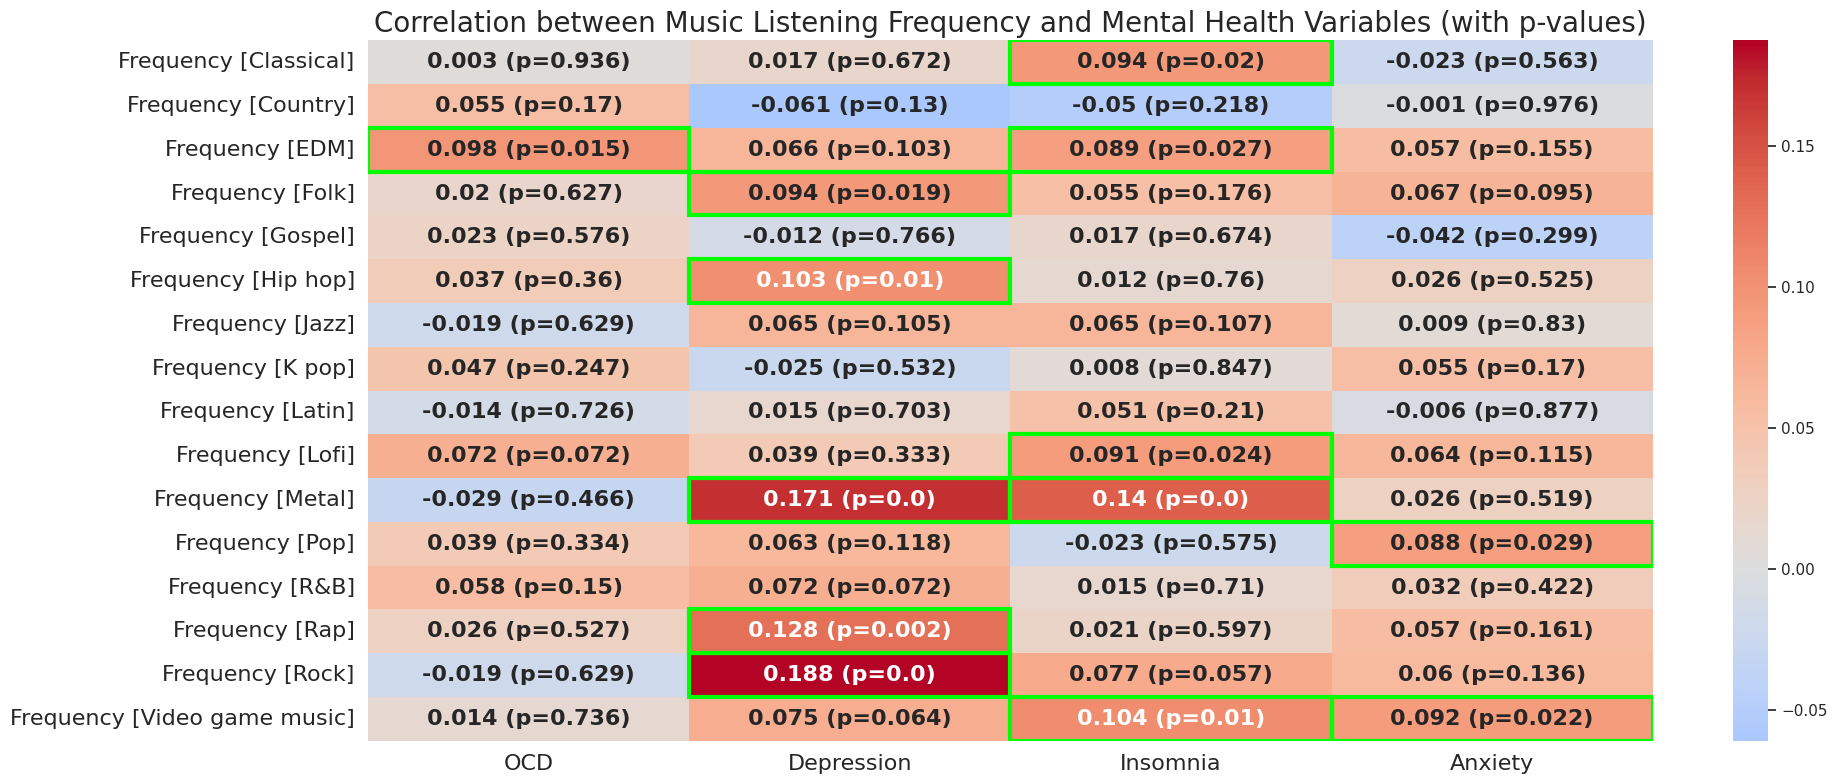

In [ ]:
selected_columns = frequency_columns + mental_health_vars
data_selected = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Calculate p-values
p_values = pd.DataFrame(index=frequency_columns, columns=mental_health_vars)
for freq_col in frequency_columns:
    for mh_col in mental_health_vars:
        corr, p_value = pearsonr(data_selected[freq_col], data_selected[mh_col])
        p_values.loc[freq_col, mh_col] = p_value.round(3)

# Combine correlation and p-values into a single string for annotation

annotations = correlation_matrix.loc[frequency_columns, mental_health_vars].round(3).astype(str) + " (p=" + p_values.round(3).astype(str) + ")"

# Plot the heatmap
plt.figure(figsize=(20, 8))

# Heatmap for correlation coefficients with combined annotations
heatmap = sns.heatmap(correlation_matrix.loc[frequency_columns, mental_health_vars],
            annot=annotations, fmt='', cmap='coolwarm', center=0, cbar=True,
            annot_kws={"size": 16, "weight": "bold"})

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

# Add colored rectangles around significant p-values
for i in range(p_values.shape[0]):
    for j in range(p_values.shape[1]):
        if p_values.iloc[i, j] < 0.05:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='#00FF00', lw=3))

plt.title('Correlation between Music Listening Frequency and Mental Health Variables (with p-values)', fontsize=20)
plt.tight_layout()
plt.show()

* **OCD:** Significant weak positive association with the frequency of listening to EDM.
* **Depression:** The strongest weak positive associations with depression are observed in the following order: rock, metal, rap, hip hop, and folk music.
* **Insomnia:** Significant weak positive associations with insomnia are found in the following order: metal, video game music, classical, lofi, and EDM music.
* **Anxiety:** Significant weak positive associations with anxiety are observed with video game music and pop music.


### 2.  what is the relation between "frequency" of listening to different genres  and "Music effect on them"?

In [ ]:

frequency_columns = [
    'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'
]

# Ensure 'Music effect' is treated as a categorical variable
data['Music effects'] = data['Music effects'].astype('category')

# Perform Chi-Square Test for each genre
chi2_results = {}
for col in frequency_columns:
    contingency_table = pd.crosstab(data[col], data['Music effects'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p}

# Convert results to DataFrame for better visualization
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index')
print(chi2_results_df)

                                   Chi2   p-value
Frequency [Classical]          2.058223  0.914267
Frequency [Country]            5.952279  0.428557
Frequency [EDM]                8.662960  0.193439
Frequency [Folk]               2.878367  0.823951
Frequency [Gospel]             9.602829  0.142405
Frequency [Hip hop]            7.263760  0.297142
Frequency [Jazz]               2.766032  0.837587
Frequency [K pop]              9.601798  0.142454
Frequency [Latin]              4.866667  0.561024
Frequency [Lofi]               9.030582  0.171865
Frequency [Metal]              2.239115  0.896446
Frequency [Pop]               10.391590  0.109101
Frequency [R&B]               11.184486  0.082839
Frequency [Rap]                2.134675  0.906905
Frequency [Rock]               3.339987  0.765122
Frequency [Video game music]   9.092093  0.168465


The chi-square test results show that none of the music genres have a significant relationship with the perceived effect of music, as all p-values are greater than the 0.05 threshold. However, the genres with the lowest p-values, indicating the strongest (though not significant) associations, are R&B (p = 0.082839), Pop (p = 0.109101), and Gospel (p = 0.142405).

## RQ3 Effect of exploration



### 1.  what is the relation between "exploration" and "OCD", "depression", "Insomnia", "Anxiety"?




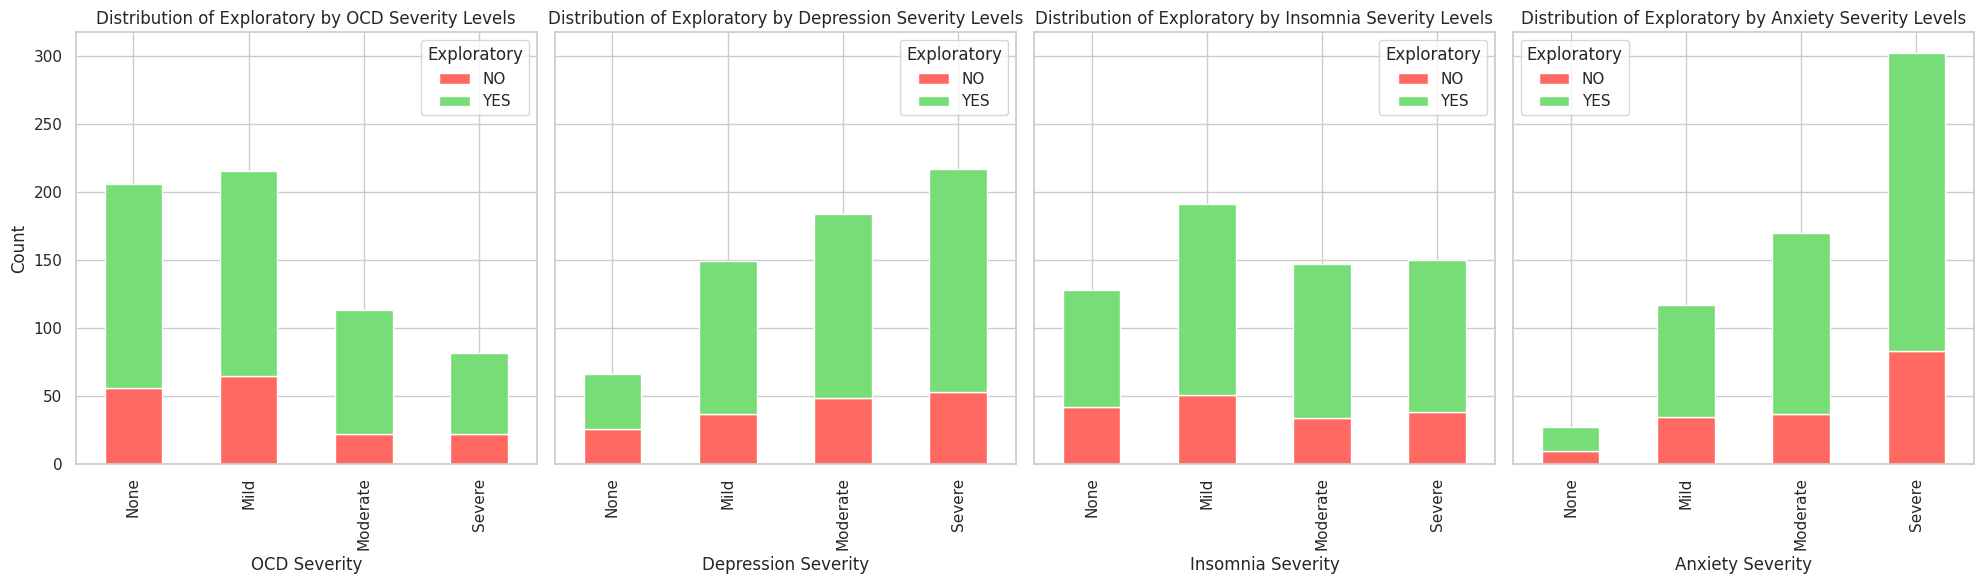

In [ ]:
mental_health_vars = ['OCD', 'Depression', 'Insomnia', 'Anxiety']
severity_columns = ['OCD_Sev', 'Depression_Sev', 'Insomnia_Sev', 'Anxiety_Sev']

# Define custom palette
custom_palette = {1: '#77dd77',  # Pastel green for YES
                  0: '#ff6961'}  # Pastel red for NO
data=df_changed.copy()


# Ensure mental health severity variables are treated as categorical
for col in severity_columns:
    data[col] = data[col].astype('category')

# Define severity labels
severity_labels = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Plot each mental health condition in its own subplot
for ax, mh_var, sev_col in zip(axes.flatten(), mental_health_vars, severity_columns):
    crosstab = pd.crosstab(data[sev_col], data['Exploratory'])
    crosstab.plot(kind='bar', stacked=True, color=[custom_palette[0], custom_palette[1]], ax=ax)
    ax.set_title(f'Distribution of Exploratory by {mh_var} Severity Levels')
    ax.set_xlabel(f'{mh_var} Severity')
    ax.set_ylabel('Count')
    ax.set_xticklabels([severity_labels[int(label.get_text())] for label in ax.get_xticklabels()])
    ax.legend(title='Exploratory', labels=['NO', 'YES'])

plt.tight_layout()
plt.show()

In [ ]:
for var in mental_health_vars:
    stat, p = stats.shapiro(data[var])
    print(f'Normality test for {var}: W={stat}, p-value={p}')

# Check homogeneity of variances using Levene's test
for var in mental_health_vars:
    stat, p = stats.levene(data[data['Exploratory'] == 1][var],
                           data[data['Exploratory'] == 0][var])
    print(f'Homogeneity of variances test for {var}: W={stat}, p-value={p}')

# Effect size (Cohen's d) for each variable
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1) * np.var(x) + (ny-1) * np.var(y)) / dof)

for var in mental_health_vars:
    d = cohen_d(data[data['Exploratory'] == 1][var],
                data[data['Exploratory'] == -0][var])
    print(f"Cohen's d for {var}: {d:.2f}")

Normality test for OCD: W=0.848246693611145, p-value=7.70849080830372e-24
Normality test for Depression: W=0.9460118412971497, p-value=3.407356387601264e-14
Normality test for Insomnia: W=0.9154154658317566, p-value=4.713823964663581e-18
Normality test for Anxiety: W=0.9457210302352905, p-value=3.084883829504795e-14
Homogeneity of variances test for OCD: W=0.7572468959598769, p-value=0.3845315462451101
Homogeneity of variances test for Depression: W=0.17979390310811735, p-value=0.6716989285312925
Homogeneity of variances test for Insomnia: W=0.045687573642052524, p-value=0.830815691808645
Homogeneity of variances test for Anxiety: W=2.656766858872887, p-value=0.10362299000134613
Cohen's d for OCD: 0.08
Cohen's d for Depression: 0.13
Cohen's d for Insomnia: 0.11
Cohen's d for Anxiety: 0.05


Considering the normality issue and the small effect sizes, it is appropriate to use non-parametric tests. Since the homogeneity of variances assumption is met, we can proceed with non-parametric tests that are robust to non-normality.

In [ ]:
exploratory_var = 'Exploratory'  # Replace with your actual categorical exploratory variable
mental_health_vars = ['OCD', 'Depression', 'Insomnia', 'Anxiety']


# Handle missing data by dropping rows with missing values
data_clean = data.dropna(subset=mental_health_vars + [exploratory_var])

# Perform Kruskal-Wallis test for each mental health variable
for var in mental_health_vars:
    groups = [group[var].dropna() for name, group in data_clean.groupby(exploratory_var)]
    kruskal_result = stats.kruskal(*groups)
    print(f'Kruskal-Wallis test result for {var} vs {exploratory_var}: H={kruskal_result.statistic:.2f}, p-value={kruskal_result.pvalue:.4f}')

# Calculate effect size (eta squared) for Kruskal-Wallis
def eta_squared(kruskal_result, n):
    return (kruskal_result.statistic - len(groups) + 1) / (n - len(groups))

for var in mental_health_vars:
    groups = [group[var].dropna() for name, group in data_clean.groupby(exploratory_var)]
    kruskal_result = stats.kruskal(*groups)
    n = len(data_clean)
    eta_sq = eta_squared(kruskal_result, n)
    print(f"Effect size (eta squared) for {var}: {eta_sq:.2f}")

Kruskal-Wallis test result for OCD vs Exploratory: H=0.72, p-value=0.3946
Kruskal-Wallis test result for Depression vs Exploratory: H=2.11, p-value=0.1462
Kruskal-Wallis test result for Insomnia vs Exploratory: H=2.13, p-value=0.1444
Kruskal-Wallis test result for Anxiety vs Exploratory: H=0.07, p-value=0.7939
Effect size (eta squared) for OCD: -0.00
Effect size (eta squared) for Depression: 0.00
Effect size (eta squared) for Insomnia: 0.00
Effect size (eta squared) for Anxiety: -0.00


In [ ]:
for var in mental_health_vars:
    group1 = data_clean[data_clean[exploratory_var] == 1][var]  # Replace 'Group1' with actual category name
    group2 = data_clean[data_clean[exploratory_var] == 0][var]  # Replace 'Group2' with actual category name
    mannwhitney_result = stats.mannwhitneyu(group1, group2)
    print(f'Mann-Whitney U test result for {var} vs {exploratory_var}: U={mannwhitney_result.statistic:.2f}, p-value={mannwhitney_result.pvalue:.4f}')

# Effect size for Mann-Whitney U
def rank_biserial_effect_size(group1, group2):
    n1 = len(group1)
    n2 = len(group2)
    U = stats.mannwhitneyu(group1, group2).statistic
    return 1 - (2 * U) / (n1 * n2)

for var in mental_health_vars:
    group1 = data_clean[data_clean[exploratory_var] == 1][var]
    group2 = data_clean[data_clean[exploratory_var] == 0][var]
    effect_size = rank_biserial_effect_size(group1, group2)
    print(f"Rank-biserial effect size for {var}: {effect_size:.2f}")

Mann-Whitney U test result for OCD vs Exploratory: U=38836.00, p-value=0.3948
Mann-Whitney U test result for Depression vs Exploratory: U=40035.00, p-value=0.1463
Mann-Whitney U test result for Insomnia vs Exploratory: U=40041.00, p-value=0.1445
Mann-Whitney U test result for Anxiety vs Exploratory: U=37715.00, p-value=0.7941
Rank-biserial effect size for OCD: -0.04
Rank-biserial effect size for Depression: -0.08
Rank-biserial effect size for Insomnia: -0.08
Rank-biserial effect size for Anxiety: -0.01


The Kruskal-Wallis and Mann-Whitney U tests both indicate no significant association between the exploratory variable and the mental health variables (OCD, Depression, Insomnia, Anxiety), with all p-values above 0.05.

### 2.  what is the relation between "exploration" and "Music effects" on them?

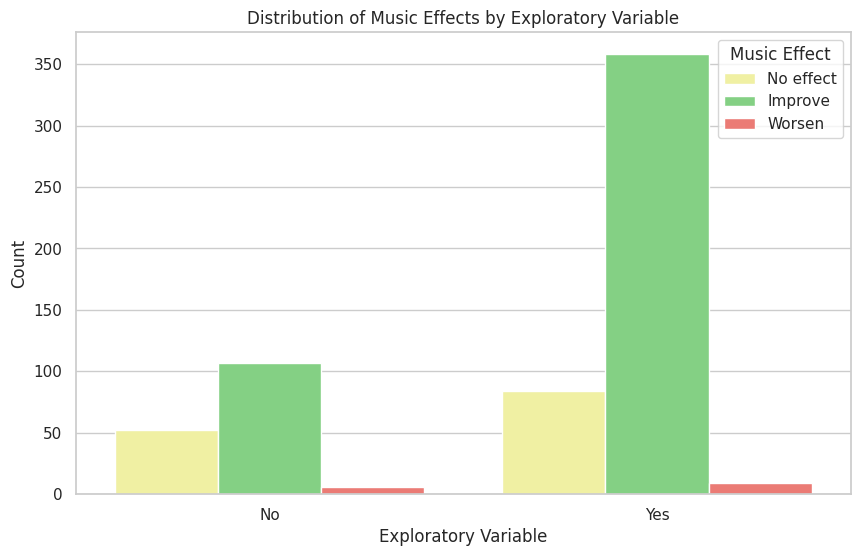

In [ ]:
data_clean = df_changed.copy()
data_clean['Exploratory'] = data['Exploratory'].map({1: 'Yes', 0: 'No'})
custom_palette = {'Improve': '#77dd77',  # Pastel green
                  'Worsen': '#ff6961',  # Pastel red
                  'No effect': '#fdfd96'}  # Pastel yellow
plt.figure(figsize=(10, 6))
sns.countplot(x='Exploratory', hue='Music_effects_label', data=data_clean, palette=custom_palette)

# Add title and labels
plt.title('Distribution of Music Effects by Exploratory Variable')
plt.xlabel('Exploratory Variable')
plt.ylabel('Count')
plt.legend(title='Music Effect')

plt.show()

In [ ]:
contingency_table = pd.crosstab(data_clean['Exploratory'], data_clean['Music_effects_label'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 13.80569054267393
p-value: 0.0010049220814855046
Degrees of Freedom: 2
Expected Frequencies:
[[124.55357143  36.42857143   4.01785714]
 [340.44642857  99.57142857  10.98214286]]


The chi-square test indicates a significant association between the 'Exploratory' variable and 'Music effects'.  The low p-value suggests that the observed differences in the effects of music across the 'Exploratory' categories are unlikely due to chance.

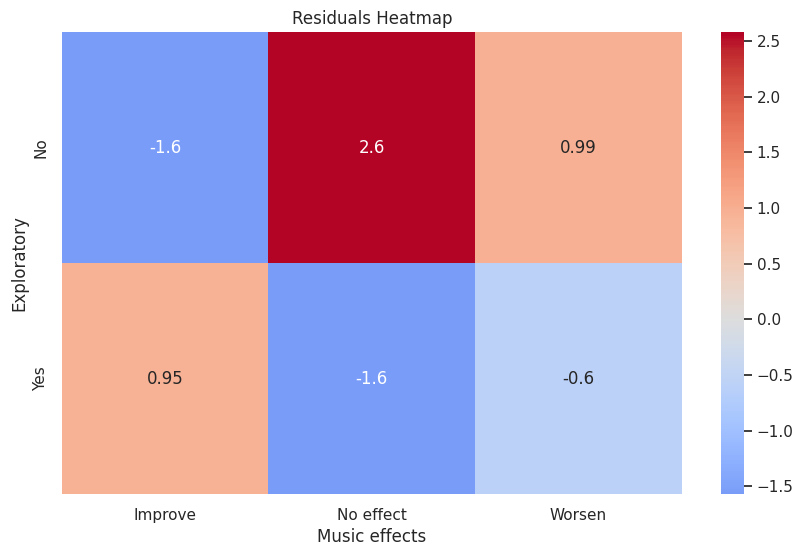

In [ ]:
# Calculate the residuals
residuals = (contingency_table - expected) / np.sqrt(expected)
# Create a heatmap of the residuals
plt.figure(figsize=(10, 6))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Residuals Heatmap')
plt.xlabel('Music effects')
plt.ylabel('Exploratory')
plt.show()

## RQ4 Effect of Foreign



### 1. what is the relation between "Foreign" and "OCD", "depression", "Insomnia", "Anxiety"?


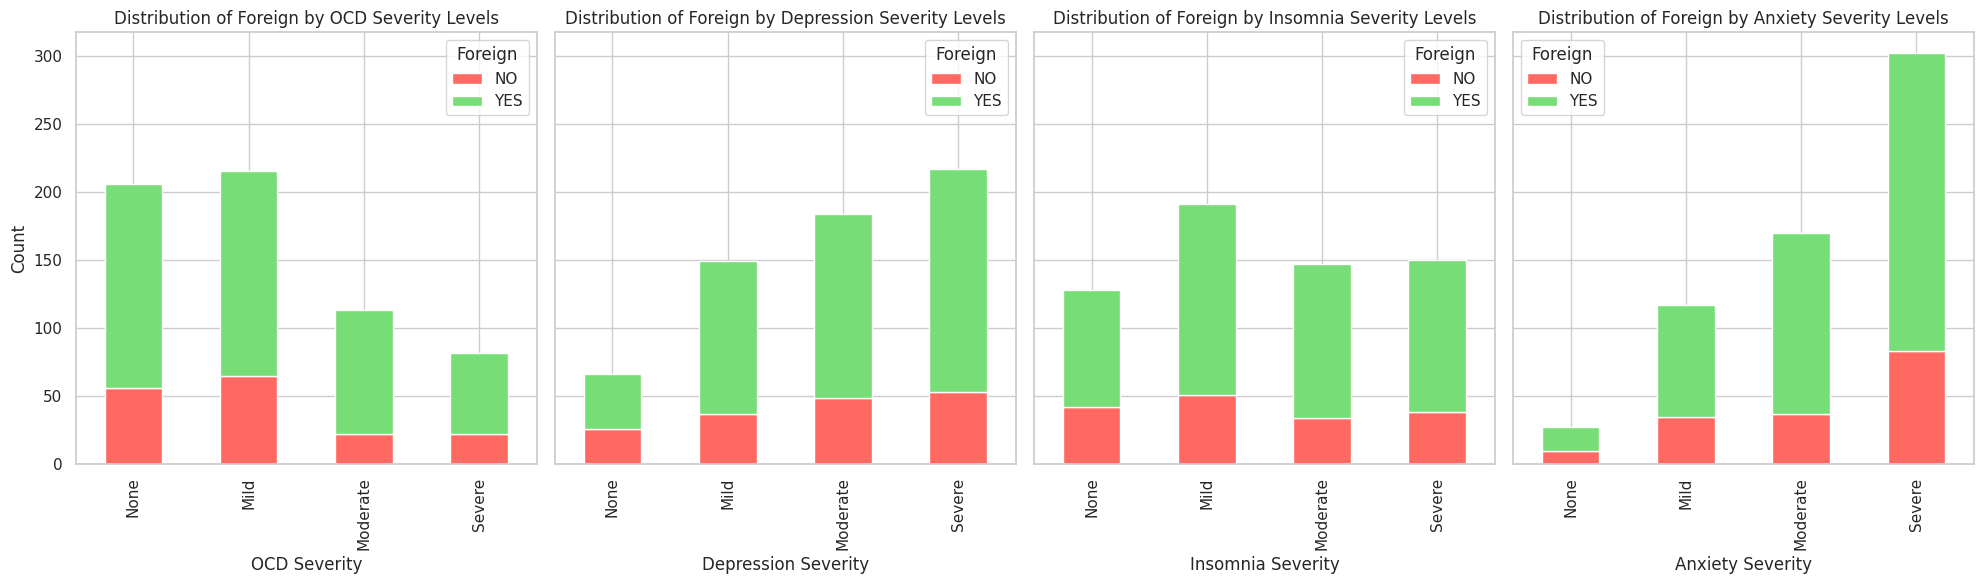

In [ ]:
mental_health_vars = ['OCD', 'Depression', 'Insomnia', 'Anxiety']
severity_columns = ['OCD_Sev', 'Depression_Sev', 'Insomnia_Sev', 'Anxiety_Sev']

# Define custom palette
custom_palette = {1: '#77dd77',  # Pastel green for YES
                  0: '#ff6961'}  # Pastel red for NO
data=df_changed.copy()


# Ensure mental health severity variables are treated as categorical
for col in severity_columns:
    data[col] = data[col].astype('category')

# Define severity labels
severity_labels = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Plot each mental health condition in its own subplot
for ax, mh_var, sev_col in zip(axes.flatten(), mental_health_vars, severity_columns):
    crosstab = pd.crosstab(data[sev_col], data['Exploratory'])
    crosstab.plot(kind='bar', stacked=True, color=[custom_palette[0], custom_palette[1]], ax=ax)
    ax.set_title(f'Distribution of Foreign by {mh_var} Severity Levels')
    ax.set_xlabel(f'{mh_var} Severity')
    ax.set_ylabel('Count')
    ax.set_xticklabels([severity_labels[int(label.get_text())] for label in ax.get_xticklabels()])
    ax.legend(title='Foreign', labels=['NO', 'YES'])

plt.tight_layout()
plt.show()

In [ ]:
target_var='Foreign languages'
for var in mental_health_vars:
    stat, p = stats.shapiro(data[var])
    print(f'Normality test for {var}: W={stat}, p-value={p}')

# Check homogeneity of variances using Levene's test
for var in mental_health_vars:
    stat, p = stats.levene(data[data[target_var] == 1][var],
                           data[data[target_var] == 0][var])
    print(f'Homogeneity of variances test for {var}: W={stat}, p-value={p}')

# Effect size (Cohen's d) for each variable
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1) * np.var(x) + (ny-1) * np.var(y)) / dof)

for var in mental_health_vars:
    d = cohen_d(data[data[target_var] == 1][var],
                data[data[target_var] == -0][var])
    print(f"Cohen's d for {var}: {d:.2f}")

Normality test for OCD: W=0.848246693611145, p-value=7.70849080830372e-24
Normality test for Depression: W=0.9460118412971497, p-value=3.407356387601264e-14
Normality test for Insomnia: W=0.9154154658317566, p-value=4.713823964663581e-18
Normality test for Anxiety: W=0.9457210302352905, p-value=3.084883829504795e-14
Homogeneity of variances test for OCD: W=0.8453726525849331, p-value=0.35822575957790903
Homogeneity of variances test for Depression: W=0.00427300225008163, p-value=0.9479021156423003
Homogeneity of variances test for Insomnia: W=0.8690307387642825, p-value=0.3515901930578671
Homogeneity of variances test for Anxiety: W=0.11458869308454463, p-value=0.7350949789158032
Cohen's d for OCD: -0.08
Cohen's d for Depression: 0.17
Cohen's d for Insomnia: 0.09
Cohen's d for Anxiety: 0.16


Considering the normality issue and the small effect sizes, it is appropriate to use non-parametric tests. Since the homogeneity of variances assumption is met, we can proceed with non-parametric tests that are robust to non-normality.

In [ ]:
  # Replace with your actual categorical exploratory variable
mental_health_vars = ['OCD', 'Depression', 'Insomnia', 'Anxiety']


# Handle missing data by dropping rows with missing values
data_clean = data.dropna(subset=mental_health_vars + [target_var])

# Perform Kruskal-Wallis test for each mental health variable
for var in mental_health_vars:
    groups = [group[var].dropna() for name, group in data_clean.groupby(target_var)]
    kruskal_result = stats.kruskal(*groups)
    print(f'Kruskal-Wallis test result for {var} vs {target_var}: H={kruskal_result.statistic:.2f}, p-value={kruskal_result.pvalue:.4f}')

# Calculate effect size (eta squared) for Kruskal-Wallis
def eta_squared(kruskal_result, n):
    return (kruskal_result.statistic - len(groups) + 1) / (n - len(groups))

for var in mental_health_vars:
    groups = [group[var].dropna() for name, group in data_clean.groupby(target_var)]
    kruskal_result = stats.kruskal(*groups)
    n = len(data_clean)
    eta_sq = eta_squared(kruskal_result, n)
    print(f"Effect size (eta squared) for {var}: {eta_sq:.2f}")

Kruskal-Wallis test result for OCD vs Foreign languages: H=0.54, p-value=0.4619
Kruskal-Wallis test result for Depression vs Foreign languages: H=4.98, p-value=0.0257
Kruskal-Wallis test result for Insomnia vs Foreign languages: H=1.27, p-value=0.2606
Kruskal-Wallis test result for Anxiety vs Foreign languages: H=4.22, p-value=0.0399
Effect size (eta squared) for OCD: -0.00
Effect size (eta squared) for Depression: 0.01
Effect size (eta squared) for Insomnia: 0.00
Effect size (eta squared) for Anxiety: 0.01


In [ ]:
for var in mental_health_vars:
    group1 = data_clean[data_clean[target_var] == 1][var]  # Replace 'Group1' with actual category name
    group2 = data_clean[data_clean[target_var] == 0][var]  # Replace 'Group2' with actual category name
    mannwhitney_result = stats.mannwhitneyu(group1, group2)
    print(f'Mann-Whitney U test result for {var} vs {target_var}: U={mannwhitney_result.statistic:.2f}, p-value={mannwhitney_result.pvalue:.4f}')

# Effect size for Mann-Whitney U
def rank_biserial_effect_size(group1, group2):
    n1 = len(group1)
    n2 = len(group2)
    U = stats.mannwhitneyu(group1, group2).statistic
    return 1 - (2 * U) / (n1 * n2)

for var in mental_health_vars:
    group1 = data_clean[data_clean[target_var] == 1][var]
    group2 = data_clean[data_clean[target_var] == 0][var]
    effect_size = rank_biserial_effect_size(group1, group2)
    print(f"Rank-biserial effect size for {var}: {effect_size:.2f}")

Mann-Whitney U test result for OCD vs Foreign languages: U=45095.00, p-value=0.4620
Mann-Whitney U test result for Depression vs Foreign languages: U=51534.00, p-value=0.0257
Mann-Whitney U test result for Insomnia vs Foreign languages: U=49117.50, p-value=0.2607
Mann-Whitney U test result for Anxiety vs Foreign languages: U=51143.00, p-value=0.0399
Rank-biserial effect size for OCD: 0.03
Rank-biserial effect size for Depression: -0.10
Rank-biserial effect size for Insomnia: -0.05
Rank-biserial effect size for Anxiety: -0.10


The Kruskal-Wallis and Mann-Whitney U tests both indicate that there are significant differences between Foreign languages and Depression and Anxiety.

### 2.  what is the relation between "Foreign" and "Music effect on them"?


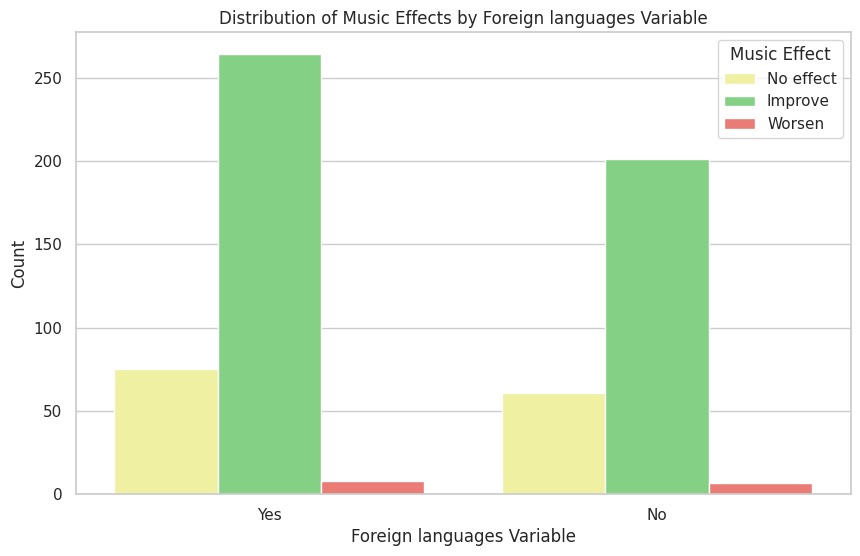

In [ ]:
data_clean = df_changed.copy()
data_clean[target_var] = data_clean[target_var].map({1: 'Yes', 0: 'No'})
custom_palette = {'Improve': '#77dd77',  # Pastel green
                  'Worsen': '#ff6961',  # Pastel red
                  'No effect': '#fdfd96'}  # Pastel yellow
plt.figure(figsize=(10, 6))
sns.countplot(x=target_var, hue='Music_effects_label', data=data_clean, palette=custom_palette)

# Add title and labels
plt.title('Distribution of Music Effects by '+ target_var+' Variable')
plt.xlabel(target_var+' Variable')
plt.ylabel('Count')
plt.legend(title='Music Effect')

plt.show()

In [ ]:
contingency_table = pd.crosstab(data_clean[target_var], data_clean['Music_effects_label'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 0.16942002408357176
p-value: 0.918778680527373
Degrees of Freedom: 2
Expected Frequencies:
[[203.06006494  59.38961039   6.55032468]
 [261.93993506  76.61038961   8.44967532]]


The chi-square test indicates there is no significant association between the 'Foreign language' variable and 'Music effects'.

## Hypothesis 1 Interaction effect

In [ ]:
# Perform ANOVA for each mental health variable
for var in mental_health_vars:
    formula = f'Q("{var}") ~ Q("Hours per day") * Q("background") * Q("While working") * Q("Music effects")'
    model = ols(formula, data=data_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {var}:")
    print(anova_table)
    print("\n")


ANOVA for OCD:
                                                         sum_sq     df  \
Q("Hours per day")                                    37.517853    1.0   
Q("background")                                        3.409131    1.0   
Q("Hours per day"):Q("background")                     0.206952    1.0   
Q("While working")                                    17.632186    1.0   
Q("Hours per day"):Q("While working")                  0.305426    1.0   
Q("background"):Q("While working")                     0.862668    1.0   
Q("Hours per day"):Q("background"):Q("While wor...     2.307784    1.0   
Q("Music effects")                                     6.481042    1.0   
Q("Hours per day"):Q("Music effects")                  2.584384    1.0   
Q("background"):Q("Music effects")                     0.012264    1.0   
Q("Hours per day"):Q("background"):Q("Music eff...     1.882314    1.0   
Q("While working"):Q("Music effects")                  0.321571    1.0   
Q("Hours per day"):Q("W


**Significant Effects:**
1. **"Fav genre"**
   - **F = 1.913965, p = 0.041035**
   - Indicates a significant effect of favorite genre on the unspecified dependent variable.

2. **"Exploratory""Music effects"**
   - **F = 5.929020, p = 0.015229**
   - Indicates a significant interaction between exploratory behavior and music effects on the unspecified dependent variable.

3. **"Exploratory""Fav genre""Music effects"**
   - **F = 1.815545, p = 0.042927**
   - Indicates a significant three-way interaction between exploratory behavior, favorite genre, and music effects on the unspecified dependent variable.

**Anxiety**

1. **"Foreign languages"**
   - **F = 4.388978, p = 0.036655**
   - Indicates a significant effect of foreign language proficiency on anxiety.

2. **"Music effects"**
   - **F = 9.442301, p = 0.002232**
   - Indicates a significant effect of music effects on anxiety.

3. **"Exploratory""Fav genre""Music effects"**
   - **F = 2.441790, p = 0.004250**
   - Indicates a significant three-way interaction between exploratory behavior, favorite genre, and music effects on anxiety.

4. **"Foreign languages""Exploratory""Fav genre""Music effects"**
   - **F = 1.805732, p = 0.030998**
   - Indicates a significant four-way interaction involving foreign languages, exploratory behavior, favorite genre, and music effects on anxiety.



## Hypothesis 2 Interaction effect

In [ ]:
# Perform ANOVA for each mental health variable
for var in mental_health_vars:
    formula = f'Q("{var}") ~ Q("Foreign languages") * Q("Exploratory") * Q("Fav genre") * Q("Music effects")'
    model = ols(formula, data=data_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {var}:")
    print(anova_table)
    print("\n")


ANOVA for OCD:
                                                         sum_sq     df  \
Q("Foreign languages")                                10.810931    1.0   
Q("Fav genre")                                        34.040312   15.0   
Q("Foreign languages"):Q("Fav genre")                106.278704   15.0   
Q("Exploratory")                                      11.008753    1.0   
Q("Foreign languages"):Q("Exploratory")               41.510711    1.0   
Q("Exploratory"):Q("Fav genre")                      130.904788   15.0   
Q("Foreign languages"):Q("Exploratory"):Q("Fav ...    93.110247   15.0   
Q("Music effects")                                    11.188128    1.0   
Q("Foreign languages"):Q("Music effects")              0.903959    1.0   
Q("Fav genre"):Q("Music effects")                    166.807528   15.0   
Q("Foreign languages"):Q("Fav genre"):Q("Music ...    88.274859   15.0   
Q("Exploratory"):Q("Music effects")                   13.740583    1.0   
Q("Foreign languages"):

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 10
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 11
  warnings.warn('covariance of constraints does not have full '
/usr/




ANOVA for Depression:
                                                         sum_sq     df  \
Q("Foreign languages")                                25.486143    1.0   
Q("Fav genre")                                       298.835098   15.0   
Q("Foreign languages"):Q("Fav genre")                 86.543548   15.0   
Q("Exploratory")                                       4.326774    1.0   
Q("Foreign languages"):Q("Exploratory")                0.034615    1.0   
Q("Exploratory"):Q("Fav genre")                      124.507560   15.0   
Q("Foreign languages"):Q("Exploratory"):Q("Fav ...    55.005196   15.0   
Q("Music effects")                                     1.533485    1.0   
Q("Foreign languages"):Q("Music effects")              0.044028    1.0   
Q("Fav genre"):Q("Music effects")                    204.477403   15.0   
Q("Foreign languages"):Q("Fav genre"):Q("Music ...    97.160003   15.0   
Q("Exploratory"):Q("Music effects")                    1.051603    1.0   
Q("Foreign la

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 10
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/usr/

ANOVA for Insomnia:
                                                         sum_sq     df  \
Q("Foreign languages")                                 8.247001    1.0   
Q("Fav genre")                                       270.127758   15.0   
Q("Foreign languages"):Q("Fav genre")                 44.785556   15.0   
Q("Exploratory")                                      17.032160    1.0   
Q("Foreign languages"):Q("Exploratory")               21.217984    1.0   
Q("Exploratory"):Q("Fav genre")                       66.174315   15.0   
Q("Foreign languages"):Q("Exploratory"):Q("Fav ...   239.062645   15.0   
Q("Music effects")                                     0.518071    1.0   
Q("Foreign languages"):Q("Music effects")              7.531285    1.0   
Q("Fav genre"):Q("Music effects")                    147.990579   15.0   
Q("Foreign languages"):Q("Fav genre"):Q("Music ...   139.658783   15.0   
Q("Exploratory"):Q("Music effects")                   55.786219    1.0   
Q("Foreign languag

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 8
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/usr/l

**OCD**
- **Hours per day** (\(F = 4.77, p = 0.029\)):
  - There is a significant main effect of `Hours per day` on OCD, indicating that the amount of time spent daily has a measurable impact on OCD levels.
- **Hours per day` * `background` * `While working` * `Music effects** (\(F = 6.54, p = 0.011\)):
  - The significant four-way interaction between `Hours per day`, `background`, `While working`, and `Music effects` suggests a complex relationship where the impact of daily hours on OCD levels depends on the combination of background environment, activities while working, and music effects. This implies that interventions for OCD may need to consider multiple contextual factors together rather than in isolation.

**Depression**
- **Hours per day` * `background` * `Music effects** (\(F = 7.67, p = 0.006\)):
  - The significant three-way interaction involving `Hours per day`, `background`, and `Music effects` indicates that the effect of daily hours and background on Depression is significantly influenced by music.

**Insomnia**
- **Hours per day** (\(F = 8.45, p = 0.004\)):
  - A significant main effect of `Hours per day` on Insomnia suggests that the daily time spent has a notable impact on Insomnia levels.
- **background** (\(F = 4.46, p = 0.035\)):
  - There is a significant main effect of `background` on Insomnia, indicating that different backgrounds affect Insomnia levels.
- **Hours per day` * `background` * `Music effects** (\(F = 4.13, p = 0.043\)):
  - This significant three-way interaction shows that the effect of `Hours per day` and `background` on Insomnia is influenced by `Music effects`.
- **While working` * `Music effects** (\(F = 8.27, p = 0.004\)):
  - A significant two-way interaction effect suggests that the effect of `While working` on Insomnia is moderated by `Music effects`.
  The main effects of `Hours per day` and `background` on Insomnia show that both daily time spent and background environment independently affect Insomnia levels. Additionally, the significant interactions highlight that the combined effects of these factors are moderated by music and activities while working.

**Anxiety**
- **Music effects** (\(F = 7.22, p = 0.007\)):
  - A significant main effect of `Music effects` on Anxiety indicates that different types of music have a measurable impact on Anxiety levels.
- **Hours per day` * `Music effects** (\(F = 4.84, p = 0.028\)):
  - This significant two-way interaction effect suggests that the influence of `Hours per day` on Anxiety varies depending on the `Music effects`.



1. **OCD**:
   - The mean value for OCD appears relatively low across all categories.
   - There is some variability, but it remains consistently lower compared to Depression and Insomnia.

2. **Depression**:
   - The mean values for Depression are higher compared to OCD.
   - There is significant variability within each category, as indicated by the long error bars.
   - The mean values fluctuate across different hours per day categories but generally trend around the middle to higher range.

3. **Insomnia**:
   - Insomnia mean values are generally higher than those for OCD and slightly lower than or similar to those for Depression.
   - The error bars indicate high variability, suggesting a wide range of responses within each category.


Because the data has high variability, it can be insightful to use the median that is more robust to this kind of data.

1. **OCD**:
   - The median values for OCD are consistently low across all categories, similar to the mean values.
   - The IQRs are smaller than the standard deviations, indicating that the central 50% of the data points are closer to the median.

2. **Depression**:
   - Median values for Depression are higher than those for OCD, similar to the mean values.
   - The IQRs are generally smaller than the standard deviations, but still show substantial variability, indicating some spread in the central data points.

3. **Insomnia**:
   - Median values for Insomnia are comparable to or slightly lower than those for Depression.
   - The IQRs are also smaller than the standard deviations, indicating that while there is variability, the central data points are closer to the median.
